<center> <h2><font> Python and Machine Learning CA Part 1</font></h2> </center>

<center> <h2><font> (Classification on Diabetes dataset) </font><h2> </center>
    <center> <h3><font> SA52 Team 2 </font><h3> </center>

| Name | Student ID
| :-: |:-:
| Fun Weng Lup, Ronnie | A0230477E
| Aye Phyu Sin | A0230446M
| Changying Shao | A0230469A
| Willard Toh Hui Kian | A0226755X
| Chen Wenquan | A0230451W
| Chia Yan Long, Brandon | A0097266R
| Hou Lu Chiok Weh Alejandro | A0230492L
| Zhao Qi | A0230464M


## Table of Contents
* [1. Problem Statement](#1)
* [2. Data Source and Data Dictionary](#2)
* [3. Modelling with Raw Data](#3)
* [4. Impact of Data Engineering on Modelling Results](#4)
    * [4.1 Modelling after Data Cleaning](#4.1)
    * [4.2 Modelling after Data Re-Sampling](#4.2)
        * [4.2.1 Undersampling the Majority](#4.2.1)
        * [4.2.2 Oversampling the Minority](#4.2.2)
        * [4.2.3 SMOTE(Synthetic Minority Oversampling Technique)](#4.2.3)
        * [4.2.4 Impact of Data Resampling](#4.2.4)
* [5. Impact of Feature Engineering on Modelling Results](#5)
    * [5.1 Modelling after Feature Selection](#5.1)
    * [5.2 Modelling after Feature Extraction](#5.2)
* [6. Conclusions](#6)
* [7. Learning Points](#7)
* [8. References](#8)


<span id = '1'> <h1><font color=darkblue> 1. Problem Statement </font></h1> </span> 

Diabetes is a leading chronic disease that affects an increasing number of people all over the world. The disease results from high blood glucose (blood sugar) due to an inability to properly derive energy from food, primarily in the form of glucose. Finding the disease at the early stage helps reduce medical costs and the risk of patients having more complicated health problems. In this project, we will use dataset collected by National Institute of Diabetes and Digestive and Kidney Diseases in the US to conduct machine learning, aiming to predict whether a female person of age above 21 has diabetes or not based on information about the patient such as blood pressure, body mass index (BMI), age, etc.

In this project, three classification algorithms are adopted: Logistic Regression, Decision Tree and K-Nearest Neighbors (KNN). We also find the optimal maximum depth for Decision Tree and optimal number of neighbors k for KNN. Data Engineering (data cleaning and data sampling) and Feature Engineering (feature selection and feature extraction) are also applied to investigate their impact on modelling results.

<span id='2'> <h1> <font color=darkblue> 2. Data Source and Data Dictionary </font></h1> </span> 

### Data Source

The dataset was downloaded from  https://www.kaggle.com/rahulsah06/machine-learning-for-diabetes-with-python. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases in the US. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage(subgroup of native Americans).

### Data Dictionary

The dataset consists of eight medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. The detailed information is listed as below:

1. **Pregnancies**: int64, Number of pregnant times
2. **Glucose**: int64, plasma glucose concentration over 2 hours in an oral glucose tolerance test
3. **BloodPressure**: int64, diastolic blood pressure (mm Hg)
4. **SkinThickness**: int64, Triceps skin fold thickness (mm)
5. **Insulin**: int64, 2-Hour serum insulin (mu U/ml)
6. **BMI**: float64, Body mass index (weight in kg/(height in m)2)
7. **DiabetesPedigreeFunction**: float64, Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
8. **Age**: int64, Age (years)
9. **Outcome**: int64, Class variable (0 if non-diabetic, 1 if diabetic)

<span id='3'> <h1> <font color=darkblue>3. Modelling with Raw Data </font></h1> </span> 

 ### Import Libraries and Dependencies

In [1]:
## import all the libraries and dependencies that we we need in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import graphviz
from graphviz import Source

import sklearn
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn import tree
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
#import tensorflow as df

from collections import Counter
import imblearn
import time

from imblearn.over_sampling import SMOTE

### Import Data and Visualize Data

In [2]:
df_source = pd.read_csv('diabetes_data_raw.csv')
df_source.head() # show the first five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df_source.tail() # show the last five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df_source.columns
# 9 columns in total

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df_source.shape

# The raw dataset contains 768 rows and 9 columns

(768, 9)

In [6]:
df_source.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df_source.info()
# No null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


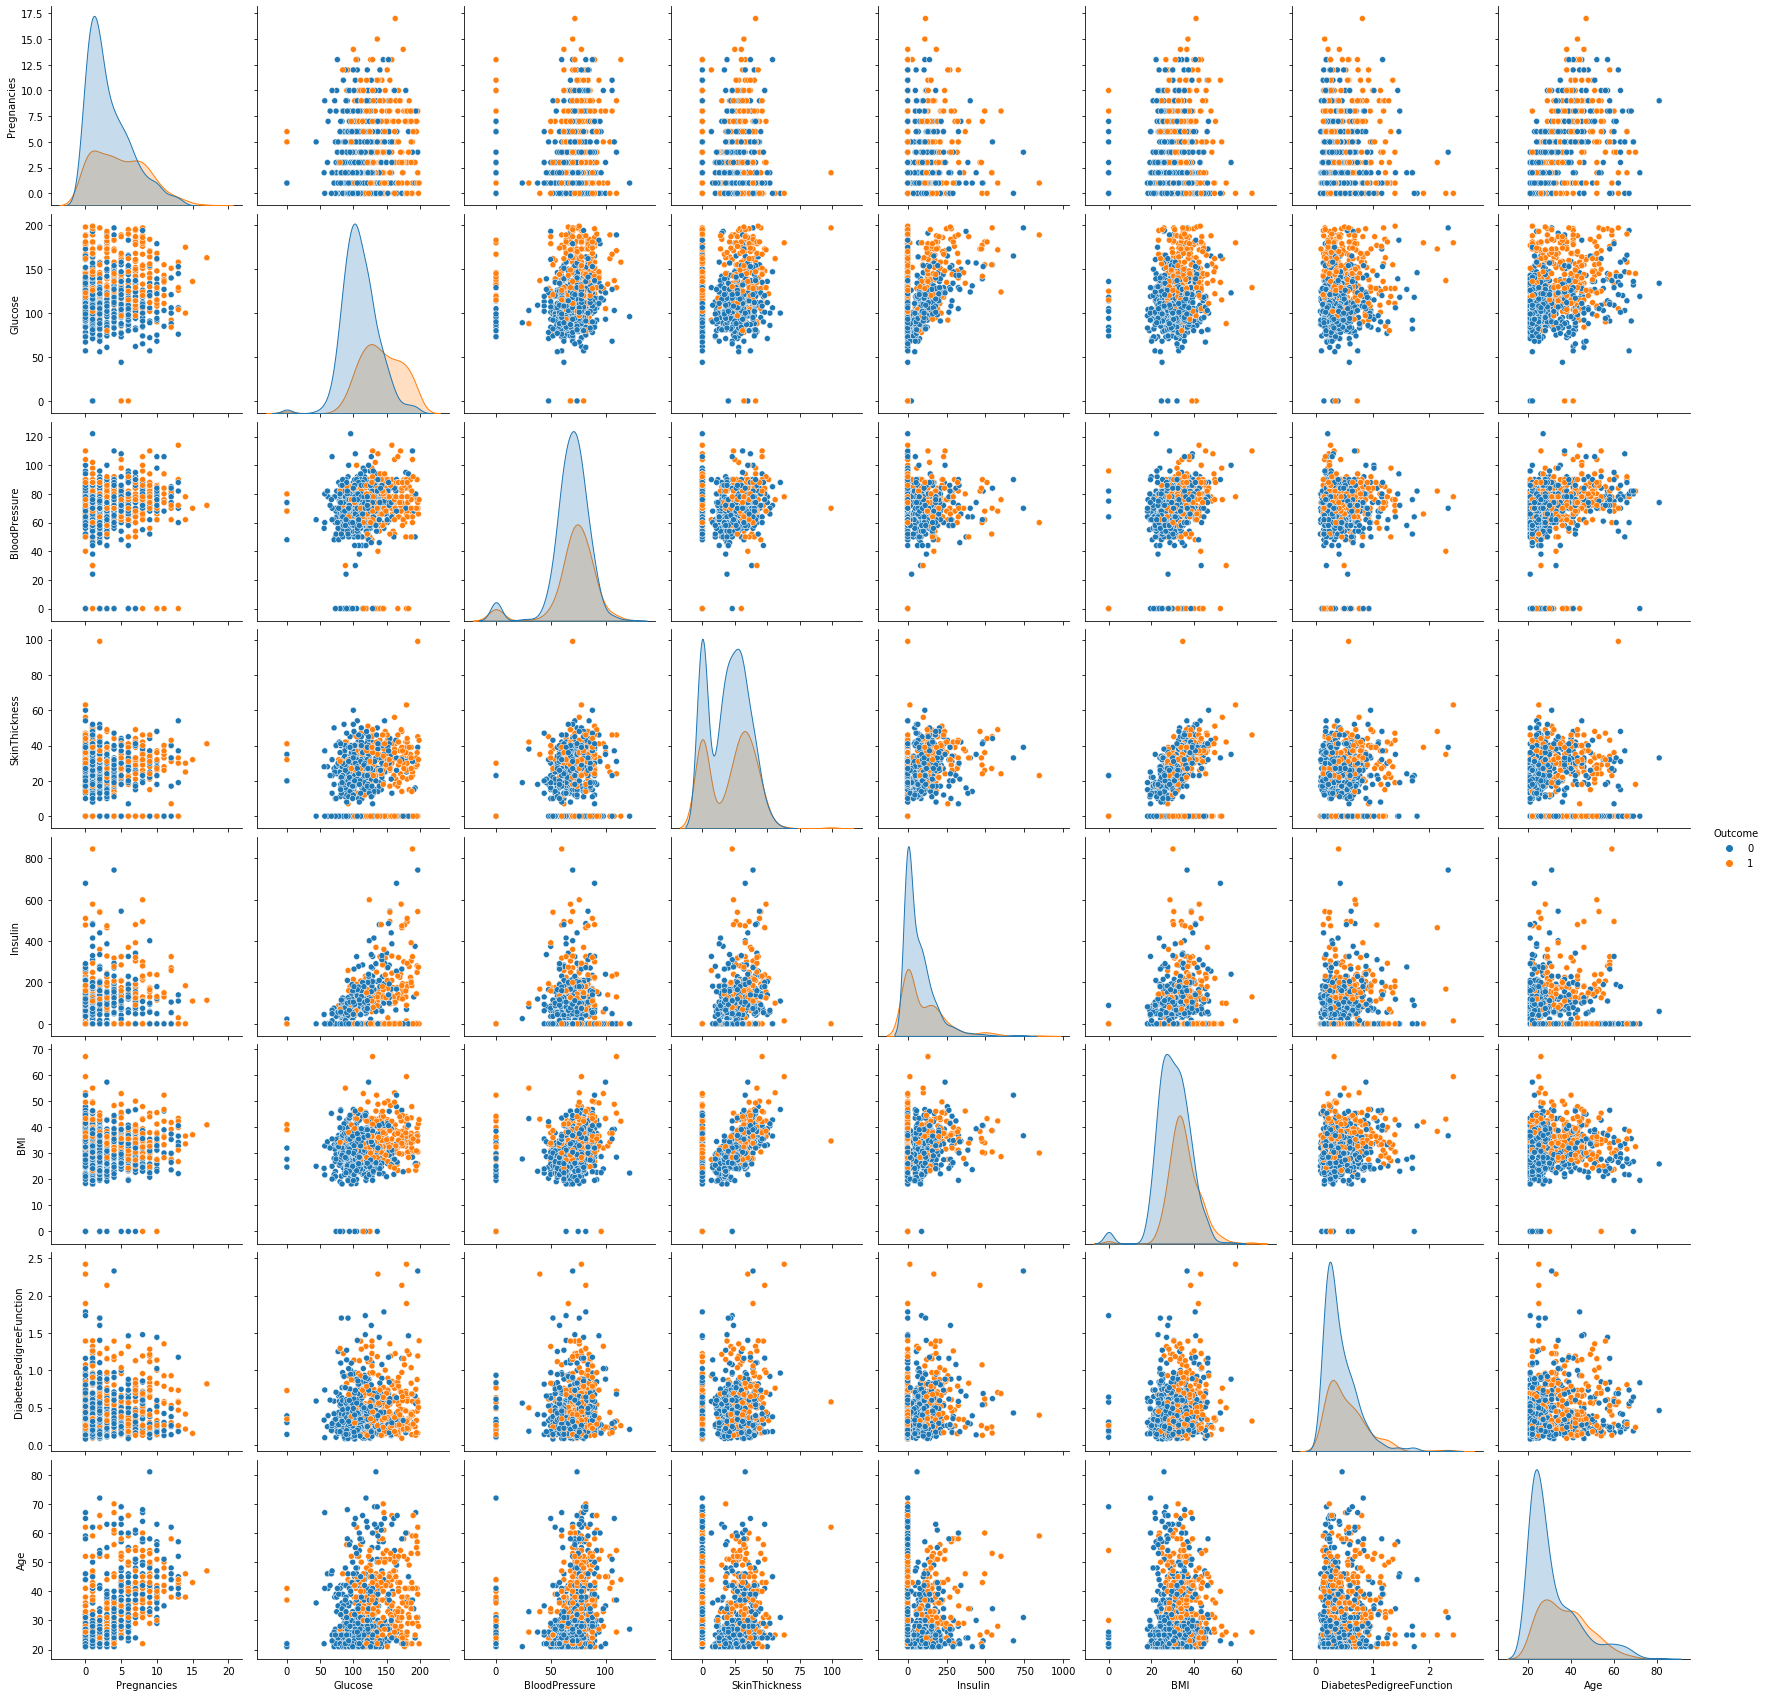

In [8]:
#Visualise the data

sns.pairplot(df_source, hue='Outcome', height=3)
plt.show()

There are 768 data records and 9 columns in the raw dataset.

As can be seen in the pairplot there are many inaccurate data such as 0 blood pressure or 0 BMI, which is impossible. However we will go ahead and proceed to use this dataset and run it for predictions to highlight the importance of data engineering. The intuition for the team is this set of data will yield a lower prediction scores due to the noise created by the unreasonable data.

### Logistic Regression Modelling on Raw Data

In [9]:
# Name the independent variable Raw_x and dependent variable Raw_y
Raw_x = df_source.iloc[:, :-1]
Raw_y = df_source.iloc[:,-1]

#split the data
Raw_x_train, Raw_x_test, Raw_y_train, Raw_y_test = train_test_split(Raw_x,Raw_y, random_state=42)

Raw_x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,129,0,30,0,39.9,0.569,44
73,4,129,86,20,270,35.1,0.231,23
352,3,61,82,28,0,34.4,0.243,46
497,2,81,72,15,76,30.1,0.547,25
145,0,102,75,23,0,0.0,0.572,21


In [10]:
# Fit the model to the training dataset

logReg = LogisticRegression (solver = 'lbfgs', max_iter = 1000) 
# The default number of iterations is 100, which will produce error when modelling
# so we increase the value to 1000

start_time = time.time()
logReg.fit(Raw_x_train, Raw_y_train)
end_time = time.time()
duration = end_time - start_time

logTrainTimeRaw = duration # the defined variables are used for populating data into tables when we summarize the modelling results

print('For Logistic Regression, training the model takes %s seconds.'%duration)

For Logistic Regression, training the model takes 0.05698108673095703 seconds.


In [11]:
# Validate the model using the test dataset

# Calculate the duration for prediction and the accuracy of the model
start_time = time.time()
Raw_y_pred = logReg.predict(Raw_x_test)
end_time = time.time() 
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
logAccuracyScoreRaw = accuracy_score(Raw_y_test, Raw_y_pred)
logTimeRaw = duration

print('For Logistic Regression, accuracy score: %s.' %accuracy_score(Raw_y_test, Raw_y_pred))
print('For Logistic Regression, prediction takes %s seconds.' %duration)

For Logistic Regression, accuracy score: 0.7239583333333334.
For Logistic Regression, prediction takes 0.001999378204345703 seconds.


In [12]:
# Display confusion matrix
confusion_matrix (Raw_y_test, Raw_y_pred)

array([[95, 28],
       [25, 44]], dtype=int64)

In [13]:
print (classification_report(Raw_y_test, Raw_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       123
           1       0.61      0.64      0.62        69

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.73       192



### Decision Tree Modelling on Raw Data

0.7135416666666666
0.7135416666666666
0.7135416666666666
0.6822916666666666
0.7239583333333334
0.7135416666666666
0.7083333333333334
0.6927083333333334
0.6979166666666666
0.6979166666666666
0.6979166666666666
0.6927083333333334
0.7083333333333334
0.7083333333333334


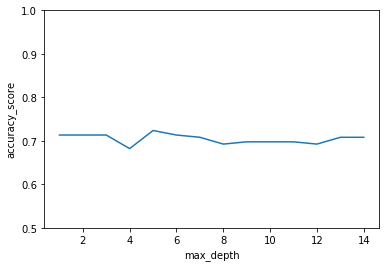

In [14]:
# use different maximum depth of the tree
depth_array = np.arange(1, 15, 1)

accuracies = []
for i in depth_array:
    dect = DecisionTreeClassifier(max_depth = i, random_state=42)
    dect.fit(Raw_x_train, Raw_y_train)
    accuracy=accuracy_score(Raw_y_test, dect.predict(Raw_x_test))
    print(accuracy)
    accuracies.append(accuracy)

plt.plot(depth_array, accuracies)
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.ylim(0.5,1)
plt.show()

# when maximum depth is  5, the accuracy is the highgest 0.755.
# Next we will use max_depth = 5 to train the model.

In [15]:
# instantiate a decision tree model. max_depth 5 is used beacuse it has the hightest accuracy socore.
dt = DecisionTreeClassifier(max_depth = 5, random_state=42)

start_time = time.time()
dt.fit(Raw_x_train, Raw_y_train)
end_time = time.time()
duration = end_time - start_time

DCTrainTimeRaw = duration # the defined variables are used for populating data into tables when we summarize the modelling results

print("For Decision Tree, training the model takes %s seconds." %duration)

For Decision Tree, training the model takes 0.003999233245849609 seconds.


In [16]:
# Validate the model using the test dataset

# Calculate the duration for prediction and the accuracy of the model
start_time = time.time()
Raw_y_pred = dt.predict(Raw_x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
DCAccuracyScoreRaw = accuracy_score(Raw_y_test, Raw_y_pred)
DCTimeRaw = duration

print("For Decision Tree, accuracy score: %s" %accuracy_score(Raw_y_test, Raw_y_pred))
print("For Decision Tree, prediction takes %s seconds." %duration)

For Decision Tree, accuracy score: 0.7239583333333334
For Decision Tree, prediction takes 0.0019989013671875 seconds.


In [17]:
# Display confusion matrix
confusion_matrix (Raw_y_test, Raw_y_pred)

array([[98, 25],
       [28, 41]], dtype=int64)

In [18]:
print (classification_report(Raw_y_test, Raw_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.62      0.59      0.61        69

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.72      0.72      0.72       192



### KNN Modelling on Raw Data

In [19]:
# we can change k value to 1 - 20, and check the accuracy score
# Then we can choose the optimized k value

# Set the various k values in an array
k_array=np.arange(1,21,2) 
k_array

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

k = 1 and accuracy = 0.6666666666666666
k = 3 and accuracy = 0.640625
k = 5 and accuracy = 0.65625
k = 7 and accuracy = 0.6822916666666666
k = 9 and accuracy = 0.7135416666666666
k = 11 and accuracy = 0.6927083333333334
k = 13 and accuracy = 0.7395833333333334
k = 15 and accuracy = 0.7395833333333334
k = 17 and accuracy = 0.7135416666666666
k = 19 and accuracy = 0.7135416666666666

The number of neighbours with the highest accuracy for K-NN is 13  and the corresponding accuracy is  0.7395833333333334


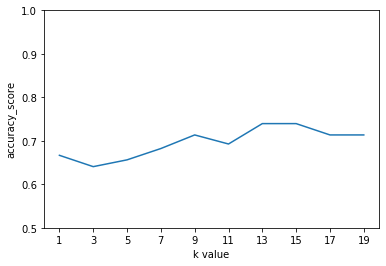

In [20]:
# Finding k with the highest accuracy for values in k_array

k_max = 0
ac_max = 0
accuracies = []

for k in k_array:  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Raw_x_train,Raw_y_train)
    ac = accuracy_score(Raw_y_test, knn.predict(Raw_x_test))
    accuracies.append(ac)
    if (ac > ac_max):
        k_max = k
        ac_max = ac
    print("k =", k, "and accuracy =", ac)
    
    
print("")
print("The number of neighbours with the highest accuracy for K-NN is", k_max, " and the corresponding accuracy is ", ac_max)


x=[1, 3, 5, 7,  9, 11, 13, 15, 17, 19]

plt.plot(k_array, accuracies)
plt.xlabel('k value')
plt.ylabel('accuracy_score')
plt.xticks(x)
plt.ylim(0.5, 1)
plt.show()
#Larger values of k generally reduces effect of the noise on the classification,
# but make boundaries between classes less distinct. Let's train the model with k that results in the highest accuracy.

In [21]:
# Model KNN with k = 13 neighbours
knn_Raw = KNeighborsClassifier(n_neighbors=k_max)

start_teime = time.time()
knn_Raw.fit(Raw_x_train,Raw_y_train)
end_time = time.time()
duration = end_time - start_time

KNNTrainTimeRaw = duration # the defined variables are used for populating data into tables when we summarize the modelling results
("For KNN, training the model with k = 9 takes %s seconds." %duration)

'For KNN, training the model with k = 9 takes 0.2808358669281006 seconds.'

In [22]:
# Make predictions on test sets
start_time = time.time()
Raw_y_pred = knn_Raw.predict(Raw_x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
KNNAccuracyScoreRaw = accuracy_score(Raw_y_test, Raw_y_pred)
KNNTimeRaw = duration


print('For KNN, accuracy score: ' + str(accuracy_score(Raw_y_test, Raw_y_pred)))
print("For KNN, prediction takes %s seconds." %duration)

For KNN, accuracy score: 0.7395833333333334
For KNN, prediction takes 0.008010149002075195 seconds.


In [23]:
# Display confusion matrix
confusion_matrix (Raw_y_test, Raw_y_pred)

array([[101,  22],
       [ 28,  41]], dtype=int64)

In [24]:
print (classification_report(Raw_y_test, Raw_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       123
           1       0.65      0.59      0.62        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



### Observations

In [25]:
#Summary of Accuracy Scores
dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Accuracy(raw data)' : [logAccuracyScoreRaw, DCAccuracyScoreRaw, KNNAccuracyScoreRaw]      
       }
summaryScore = pd.DataFrame(dict)
display(summaryScore)

,Classification Models,Accuracy(raw data)
0,Logistic Regression,0.723958
1,Decision Tree,0.723958
2,KNN,0.739583


In [26]:
#Summary of Training Duration
dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Training Duration(raw data)' : [logTrainTimeRaw, DCTrainTimeRaw, KNNTrainTimeRaw]
       }
summaryPredictionSpeed = pd.DataFrame(dict)
display(summaryPredictionSpeed)

,Classification Models,Training Duration(raw data)
0,Logistic Regression,0.056981
1,Decision Tree,0.003999
2,KNN,0.280836


In [27]:
#Summary of Prediction Duration
dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Prediction Duration(raw data)' : [logTimeRaw, DCTimeRaw, KNNTimeRaw],
       }
summaryPredictionSpeed = pd.DataFrame(dict)
display(summaryPredictionSpeed)

,Classification Models,Prediction Duration(raw data)
0,Logistic Regression,0.001999
1,Decision Tree,0.001999
2,KNN,0.008010


As can be seen from the above tables, the accuracies of the three models are in the same level. The training time and prediction time are quite short due to our small dataset (768 data records). Noticeably, KNN's training and prediction times are much longer than the other two models. 

<span id = '4'> <h1><font color=darkblue> 4. Impact of Data Engineering on Modelling Results </font></h1> </span> 

<span id='4.1'> <h2><font color=orange> 4.1 Modelling after Data Cleaning </font></h2> </span> 

We will remove the  unreasonable records of value 0 in columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'. In contrast, it's reasonable to have value 0 in columns 'Pregnancies' and 'Outcome'. 

When we explore the impact of data re-sampling, feature selection and feature extraction on modelling results, the input data will be based on cleansed dataset.

### Data Cleaning

In [28]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

df_source[cols] = df_source[cols].replace(['0', 0], np.nan)
df = df_source.dropna()
# df.to_csv('Diabetes_Data_Cleansed.csv', index=False, header=True)

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1


In [30]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26.0,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37.0,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22.0,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0


In [31]:
df.shape

(392, 9)

After data cleaning, there are 392 data records left.

### Train/Test Dataset split

In [32]:
# Read the features without target variable
x = df.iloc[:,:-1] 

# Read the last column,'Outcome' as the target
y = df.iloc[:,-1]

# Use the default split ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42) # fix random_state = 42

x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
519,6,129.0,90.0,7.0,326.0,19.6,0.582,60.0
35,4,103.0,60.0,33.0,192.0,24.0,0.966,33.0
137,0,93.0,60.0,25.0,92.0,28.7,0.532,22.0
316,3,99.0,80.0,11.0,64.0,19.3,0.284,30.0
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33.0


### Logistic Regression Modelling on Cleansed Data

In [33]:
# Fit the model to the training set

logReg = LogisticRegression (solver = 'lbfgs', max_iter = 1000) 
# The default number of iterations is 100, which will produce error when modelling
# so we increase the value to 1000

start_time = time.time()
logReg.fit(x_train, y_train)
end_time = time.time()
duration = end_time - start_time

logTrainTimeBeforeSampling = duration # the defined variables are used for populating data into tables when we summarize the modelling results

print('For Logistic Regression, training the model takes %s seconds.'%duration)

For Logistic Regression, training the model takes 0.03798723220825195 seconds.


In [34]:
# Validate the model using the test dataset

# Calculate the duration for prediction and the accuracy of the model
start_time = time.time()
y_pred = logReg.predict(x_test)
end_time = time.time() 
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
logAccuracyScoreBeforeSampling = accuracy_score(y_test, y_pred)
logTimeBeforeSampling = duration

print('For Logistic Regression, accuracy score: %s.' %accuracy_score(y_test, y_pred))
print('For Logistic Regression, prediction takes %s seconds.' %duration)

For Logistic Regression, accuracy score: 0.7448979591836735.
For Logistic Regression, prediction takes 0.001999378204345703 seconds.


In [35]:
# Display confusion matrix
confusion_matrix (y_test, y_pred)

array([[55, 11],
       [14, 18]], dtype=int64)

In [36]:
print (classification_report(y_test, y_pred))
# The F1 score can be interpreted as a weighted average of the precision and recall, 
# where an F1 score reaches its best value at 1 and worst score at 0.

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        66
           1       0.62      0.56      0.59        32

    accuracy                           0.74        98
   macro avg       0.71      0.70      0.70        98
weighted avg       0.74      0.74      0.74        98



### Decison Tree Modelling on Cleansed Data

0.7346938775510204
0.7040816326530612
0.7448979591836735
0.7551020408163265
0.7551020408163265
0.7346938775510204
0.7244897959183674
0.6938775510204082
0.7448979591836735
0.7040816326530612
0.7244897959183674
0.7346938775510204
0.7244897959183674
0.7244897959183674


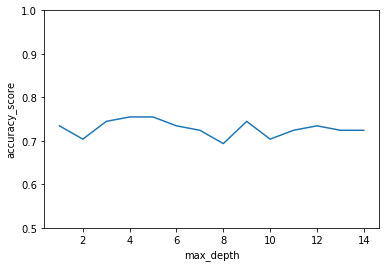

In [37]:
# use different maximum depth of the tree
depth_array = np.arange(1, 15, 1)

accuracies = []
for i in depth_array:
    dect = DecisionTreeClassifier(max_depth = i, random_state=42)
    dect.fit(x_train, y_train)
    accuracy=accuracy_score(y_test, dect.predict(x_test))
    print(accuracy)
    accuracies.append(accuracy)

plt.plot(depth_array, accuracies)
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.ylim(0.5,1)
plt.show()

# when maximum depth is 4 or 5, the accuracy is the highgest 0.755.
# Next we will use max_depth = 4 to train the model.

In [38]:
# instantiate a decision tree model. max_depth 4 is used beacuse it has the hightest accuracy socore.
dt = DecisionTreeClassifier(max_depth = 4, random_state=42)

start_time = time.time()
dt.fit(x_train, y_train)
end_time = time.time()
duration = end_time - start_time

DCTrainTimeBeforeSampling = duration # the defined variables are used for populating data into tables when we summarize the modelling results

print("For Decision Tree, training the model takes %s seconds" %duration)

For Decision Tree, training the model takes 0.0019986629486083984 seconds


In [39]:
# Validate the model using the test dataset

# Calculate the duration for prediction and the accuracy of the model
start_time = time.time()
y_pred = dt.predict(x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
DCAccuracyScoreBeforeSampling = accuracy_score(y_test, y_pred)
DCTimeBeforeSampling = duration

print("For Decision Tree, accuracy score: %s" %accuracy_score(y_test, y_pred))
print("For Decision Tree, prediction takes %s seconds." %duration)

For Decision Tree, accuracy score: 0.7551020408163265
For Decision Tree, prediction takes 0.0019989013671875 seconds.


In [40]:
# Display confusion matrix
confusion_matrix(y_test, y_pred)

array([[52, 14],
       [10, 22]], dtype=int64)

In [41]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        66
           1       0.61      0.69      0.65        32

    accuracy                           0.76        98
   macro avg       0.72      0.74      0.73        98
weighted avg       0.76      0.76      0.76        98



### KNN Modelling on Cleansed Data

In [42]:
# we can change k value to 1 - 20, and check the accuracy score
# Then we can choose the optimized k value

# Set the various k values in an array
k_array=np.arange(1,21,2) 
k_array

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

k = 1 and accuracy = 0.673469387755102
k = 3 and accuracy = 0.6836734693877551
k = 5 and accuracy = 0.7040816326530612
k = 7 and accuracy = 0.7142857142857143
k = 9 and accuracy = 0.7346938775510204
k = 11 and accuracy = 0.7346938775510204
k = 13 and accuracy = 0.7346938775510204
k = 15 and accuracy = 0.7346938775510204
k = 17 and accuracy = 0.7346938775510204
k = 19 and accuracy = 0.7244897959183674

The number of neighbours with the highest accuracy for K-NN is 9  and the corresponding accuracy is  0.7346938775510204


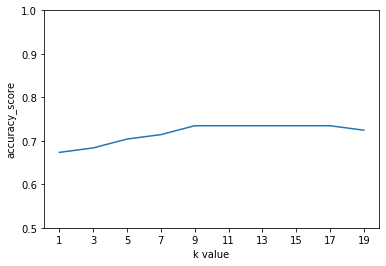

In [43]:
# Finding k with the highest accuracy for values in k_array

k_max = 0
ac_max = 0
accuracies = []

for k in k_array:  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    ac = accuracy_score(y_test, knn.predict(x_test))
    accuracies.append(ac)
    if (ac > ac_max):
        k_max = k
        ac_max = ac
    print("k =", k, "and accuracy =", ac)
    
    
print("")
print("The number of neighbours with the highest accuracy for K-NN is", k_max, " and the corresponding accuracy is ", ac_max)


x=[1, 3, 5, 7,  9, 11, 13, 15, 17, 19]

plt.plot(k_array, accuracies)
plt.xlabel('k value')
plt.ylabel('accuracy_score')
plt.xticks(x)
plt.ylim(0.5, 1)
plt.show()
#Larger values of k generally reduces effect of the noise on the classification,
# but make boundaries between classes less distinct. Let's train the model with k that results in the highest accuracy.

In [44]:
# Model KNN with k = 9 neighbours
knn_1 = KNeighborsClassifier(n_neighbors=k_max)

start_time = time.time()
knn_1.fit(x_train,y_train)
end_time = time.time()
duration = end_time - start_time

KNNTrainTimeBeforeSampling = duration # the defined variables are used for populating data into tables when we summarize the modelling results

("For KNN, training the model with k = 9 takes %s seconds." %duration)

'For KNN, training the model with k = 9 takes 0.002018451690673828 seconds.'

In [45]:
# Make predictions on test sets
start_time = time.time()
y_pred = knn_1.predict(x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
KNNAccuracyScoreBeforeSampling = accuracy_score(y_test, y_pred)
KNNTimeBeforeSampling = duration

print('For KNN, accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print("For KNN, prediction takes %s seconds" %duration)

For KNN, accuracy score: 0.7346938775510204
For KNN, prediction takes 0.005009889602661133 seconds


In [46]:
# Display the model's confusion matrix
confusion_matrix(y_test, y_pred)

array([[56, 10],
       [16, 16]], dtype=int64)

In [47]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        66
           1       0.62      0.50      0.55        32

    accuracy                           0.73        98
   macro avg       0.70      0.67      0.68        98
weighted avg       0.72      0.73      0.73        98



<h3><font color=blue> Impact of Data Cleaning</font></h3>

In [48]:
#Summary of Accuracy Scores
dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Accuracy(raw data)' : [logAccuracyScoreRaw, DCAccuracyScoreRaw, KNNAccuracyScoreRaw],
        'Accuracy(cleansed data)' : [logAccuracyScoreBeforeSampling, DCAccuracyScoreBeforeSampling, KNNAccuracyScoreBeforeSampling]    
        
       }
summaryScore = pd.DataFrame(dict)
display(summaryScore)

,Classification Models,Accuracy(raw data),Accuracy(cleansed data)
0,Logistic Regression,0.723958,0.744898
1,Decision Tree,0.723958,0.755102
2,KNN,0.739583,0.734694


In [49]:
#Summary of Training Duration
dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Training Duration(raw data)' : [logTrainTimeRaw, DCTrainTimeRaw, KNNTrainTimeRaw],
        'Training Duration(cleansed data)' : [logTrainTimeBeforeSampling, DCTrainTimeBeforeSampling, KNNTrainTimeBeforeSampling]
       }
summaryPredictionSpeed = pd.DataFrame(dict)
display(summaryPredictionSpeed)

,Classification Models,Training Duration(raw data),Training Duration(cleansed data)
0,Logistic Regression,0.056981,0.037987
1,Decision Tree,0.003999,0.001999
2,KNN,0.280836,0.002018


In [50]:
#Summary of Prediction Duration
dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Prediction Duration(raw data)' : [logTimeRaw, DCTimeRaw, KNNTimeRaw],
        'Prediction Duration Duration(cleansed data)' : [logTimeBeforeSampling, DCTimeBeforeSampling, KNNTimeBeforeSampling]
       }
summaryPredictionSpeed = pd.DataFrame(dict)
display(summaryPredictionSpeed)

,Classification Models,Prediction Duration(raw data),Prediction Duration Duration(cleansed data)
0,Logistic Regression,0.001999,0.001999
1,Decision Tree,0.001999,0.001999
2,KNN,0.008010,0.005010


1) After data cleaning, we find that the prediction accuracies don't change much as compared to raw data. This result is different from our initial intuition that cleansed data will yield much higher accuracies compared to raw data. It is because the value 0 for feature 'Glucose'(as well as for 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age') is unreasonable for humans but algorithms are not able to detect the errors. Therefore, it is very important to analyze the data and pre-process the data before feeding data into machine learning algorithms. 


2) The training time and prediction time are shorter as compared to raw data, this is due to the number of data records reducing from 768 to 392 after data cleaning. Again, KNN's training and prediction duration time are longer than the other two models. 


3) If we look at the confusion matrix and classification reports, all the three models have a better prediction on Class 0 than Class 1, which could be caused by dataset imbalance or other factors. We will explore data resampling to look at its impact on modelling results. 

<span id='4.2'> <h2><font color=orange> 4.2 Modelling after Data Resampling </font></h2> </span> 

Often in machine learning, and specifically with classification problems, we encounter imbalanced datasets. This typically refers to an issue where the classes are not represented equally.Training models with highly imbalanced data can favor the majority class which can have serious implications.

There are multiple ways to handle the issue of imbalanced datasets. The techniques we’re going to use is called resampling. Resampling changes the dataset into a more balanced one by adding instances to the minority class or deleting ones from the majority class, that way we build better machine learning models.

There are mainly two resampling methods: Undersampling and Oversampling. We will explore one undersampling method and two oversampling methods.

### Class Distribution of Original Dataset

Let's look at the class distribution of the cleansed dataset.

0    262
1    130
Name: Outcome, dtype: int64


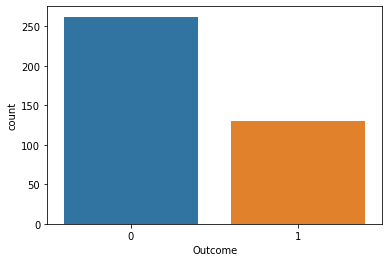

In [51]:
# print the count of each class from the target vatiables
print(y.value_counts())

# plot the count of each class from the target vatiables
sns.countplot(x=y) # note that here x means x axis in graph, y means the data column of y derived from dataset df

Then let's look at the class distribution on the training data of the cleansed dataset.

0    196
1     98
Name: Outcome, dtype: int64


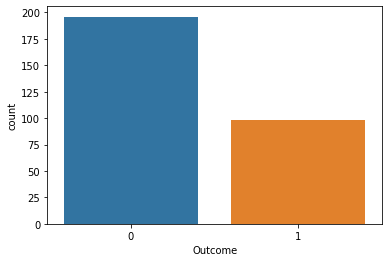

In [52]:
# print the count of each class from the target vatiables
print(y_train.value_counts())

# plot the count of each class from the target vatiables
sns.countplot(x=y_train)

As seen from the above two graphs on the distribution of classes in the dataset after data cleaning and the corresponding training dataset, the number of samples for class 0 is about twice as many as class 1, which reflects the imbalance of the data. The imbalance may affect the accuracy of our classification models, causing predictions for the class with lesser number of samples to be less accurate.

<span id='4.2.1'> <h3><font color=orange> 4.2.1 Undersampling the Majority </font></h3> </span> 

Undersampling can be defined as reducing the number of the majority class. By undersampling and removing random records from the majority class, we risk losing some important information for the machine learning algorithm to use while training and predicting.

In [53]:
# Import the resampling package
from sklearn.utils import resample

# Returning to one dataframe
training_set = pd.concat([x_train, y_train], axis=1)

# Separating classes
diabetes = training_set[training_set.Outcome == 1]
not_diabetes = training_set[training_set.Outcome == 0]

In [54]:
# Undersampling the majority
# Outcome == 1, minority, diabetes
# Outcome == 0, majority, not_diabetes

undersample = resample(not_diabetes, 
                       replace=True, 
                       n_samples=len(diabetes), #set the number of samples to equal the number of the minority class
                       random_state=42)
# Returning to new training set
undersample_train = pd.concat([diabetes, undersample])

undersample_train.Outcome.value_counts(normalize=True)

0    0.5
1    0.5
Name: Outcome, dtype: float64

Let's look at the class distributions of undersampling training set. The original training set contains 196 samples for class 0 and 98 samples for class 1, now we have equal number of samples for both classes: 98.

0    98
1    98
Name: Outcome, dtype: int64


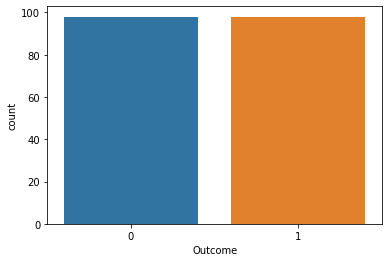

In [55]:
# print the count of each class from the target vatiables
print(undersample_train['Outcome'].value_counts())

# plot the count of each class from the target vatiables
sns.countplot(x=undersample_train['Outcome'])

We’ve got our evenly distributed classes.  Now we can test it on the classifier.

### Logistic Regression Modelling on Undersampled Data

In [56]:
# Separate undersampled data into X and y sets
undersample_x_train = undersample_train.drop('Outcome', axis=1)
undersample_y_train = undersample_train.Outcome

In [57]:
# Fit model on undersampled data

undersample_LR = LogisticRegression (solver = 'lbfgs', max_iter = 1000) 

start_time = time.time()
undersample_LR.fit(undersample_x_train, undersample_y_train)
end_time = time.time()
duration = end_time - start_time

logTrainTimeUnderSampling = duration # the defined variables are used for populating data into tables when we summarize the modelling results

print("For Logistic Regression, training the model takes %s seconds." %duration)

For Logistic Regression, training the model takes 0.0452728271484375 seconds.


In [58]:
# Make predictions on test sets
start_time = time.time()
y_pred = undersample_LR.predict(x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
logAccuracyScoreUnderSampling = accuracy_score(y_test, y_pred)
logTimeUnderSampling = duration

print('For Logistic Regression, accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print("For Logistic Regression, prediction takes %s seconds." %duration)

For Logistic Regression, accuracy score: 0.7142857142857143
For Logistic Regression, prediction takes 0.0019991397857666016 seconds.


In [59]:
# Display the model's confusion matrix
confusion_matrix (y_test, y_pred)

array([[48, 18],
       [10, 22]], dtype=int64)

In [60]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        66
           1       0.55      0.69      0.61        32

    accuracy                           0.71        98
   macro avg       0.69      0.71      0.69        98
weighted avg       0.74      0.71      0.72        98



### Decision Tree Modelling on Undersampled Data

0.7040816326530612
0.7040816326530612
0.7040816326530612
0.673469387755102
0.6836734693877551
0.7040816326530612
0.7040816326530612
0.7244897959183674
0.7244897959183674
0.7244897959183674
0.7244897959183674
0.7244897959183674
0.7244897959183674
0.7244897959183674


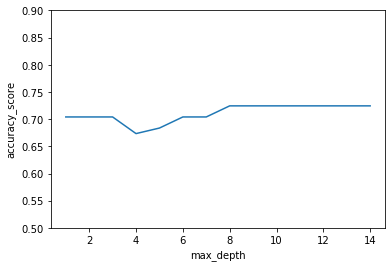

In [61]:
# use different maximum depth of the tree
depth_array = np.arange(1, 15, 1)

accuracies = []
for i in depth_array:
    dect = DecisionTreeClassifier(max_depth = i, random_state=42)
    dect.fit(undersample_x_train, undersample_y_train)
    accuracy=accuracy_score(y_test, dect.predict(x_test))
    print(accuracy)
    accuracies.append(accuracy)

plt.plot(depth_array, accuracies)
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.ylim(0.5,0.9)
plt.show()
#  when maximum depth comes to 8 or above , the accuracy is the highgest
# too many depth may cause overfitting and if we feed a different set of test data, the prediction may be not good
# Next we will use max_depth = 8 to train the model.

From the result we see that accuracy doesn't vary much with different max_depth, it's around 0.7.
When maximum depth comes to 8 or above , the accuracy is the highgest 0.724. Notice that too much depth may cause overfitting and if we feed a different set of test data, the prediction may be not good.
Next we will use max_depth = 8 to train the model.

In [62]:
# Fit model on undersampled data
undersample_DT = DecisionTreeClassifier(max_depth = 8, random_state=42)

start_time = time.time()
undersample_DT.fit(undersample_x_train, undersample_y_train)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
DCTrainTimeUnderSampling = duration

print("For Decision Tree, training the model takes %s seconds." %duration)

For Decision Tree, training the model takes 0.0029990673065185547 seconds.


In [63]:
# Make predictions on test sets
start_time = time.time()
y_pred = undersample_DT.predict(x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
DCAccuracyScoreUnderSampling = accuracy_score(y_test, y_pred)
DCTimeUnderSampling = duration

print('For Decision Tree, accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print("For Decision Tree, prediction takes %s seconds." %duration)

For Decision Tree, accuracy score: 0.7244897959183674
For Decision Tree, prediction takes 0.0020003318786621094 seconds.


In [64]:
# Display the model's confusion matrix
confusion_matrix (y_test, y_pred)

array([[47, 19],
       [ 8, 24]], dtype=int64)

In [65]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.71      0.78        66
           1       0.56      0.75      0.64        32

    accuracy                           0.72        98
   macro avg       0.71      0.73      0.71        98
weighted avg       0.76      0.72      0.73        98



###  KNN Modelling on Undersampled Data

In [66]:
# we can change k value to 1 - 20, and check the accuracy score
# Then we can choose the optimized k value

# Set the various k values in an array
k_array=np.arange(1,21,2) 
k_array

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

k = 1 and accuracy = 0.7142857142857143
k = 3 and accuracy = 0.7244897959183674
k = 5 and accuracy = 0.7653061224489796
k = 7 and accuracy = 0.7244897959183674
k = 9 and accuracy = 0.6938775510204082
k = 11 and accuracy = 0.7244897959183674
k = 13 and accuracy = 0.7142857142857143
k = 15 and accuracy = 0.7040816326530612
k = 17 and accuracy = 0.6632653061224489
k = 19 and accuracy = 0.6938775510204082

The number of neighbours with the highest accuracy for K-NN is 5  and the corresponding accuracy is  0.7653061224489796


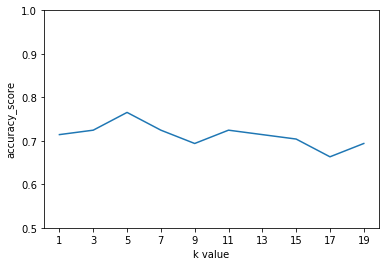

In [67]:
# Finding k with the highest accuracy for values in k_array

k_max = 0
ac_max = 0
accuracies = []

for k in k_array:  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(undersample_x_train, undersample_y_train)
    ac = accuracy_score(y_test, knn.predict(x_test))
    accuracies.append(ac)
    if (ac > ac_max):
        k_max = k
        ac_max = ac
    print("k =", k, "and accuracy =", ac)
    
    
print("")
print("The number of neighbours with the highest accuracy for K-NN is", k_max, " and the corresponding accuracy is ", ac_max)


x=[1, 3, 5, 7,  9, 11, 13, 15, 17, 19]

plt.plot(k_array, accuracies)
plt.xlabel('k value')
plt.ylabel('accuracy_score')
plt.xticks(x)
plt.ylim(0.5, 1)
plt.show()
#Larger values of k generally reduces effect of the noise on the classification,
# but make boundaries between classes less distinct. Let's train the model with k that results in the highest accuracy.

In [68]:
# Fit model on undersampled data when k results in the highest accuracy

undersample_KNN = KNeighborsClassifier(n_neighbors=k_max)

start_time = time.time()
undersample_KNN.fit(undersample_x_train, undersample_y_train)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
KNNTrainTimeUnderSampling = duration

print("For KNN, Duration of training model takes %s seconds" %duration)

For KNN, Duration of training model takes 0.001999378204345703 seconds


In [69]:
# Make predictions on test sets
start_time = time.time()
y_pred = undersample_KNN.predict(x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
KNNAccuracyScoreUnderSampling = accuracy_score(y_test, y_pred)
KNNTimeUnderSampling = duration

print('For KNN, Accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print("For KNN, Duration of predicting model takes %s seconds" %duration)

For KNN, Accuracy score: 0.7653061224489796
For KNN, Duration of predicting model takes 0.005998373031616211 seconds


In [70]:
# Display the model's confusion matrix
confusion_matrix (y_test, y_pred)

array([[53, 13],
       [10, 22]], dtype=int64)

In [71]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        66
           1       0.63      0.69      0.66        32

    accuracy                           0.77        98
   macro avg       0.73      0.75      0.74        98
weighted avg       0.77      0.77      0.77        98



### Observations

In [72]:
#Summary of Accuracy Scores
dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Accuracy(cleansed data)' : [logAccuracyScoreBeforeSampling, DCAccuracyScoreBeforeSampling, KNNAccuracyScoreBeforeSampling],    
        'Accuracy(under-sampled)' : [logAccuracyScoreUnderSampling, DCAccuracyScoreUnderSampling, KNNAccuracyScoreUnderSampling]
       }
summaryScore = pd.DataFrame(dict)
display(summaryScore)

,Classification Models,Accuracy(cleansed data),Accuracy(under-sampled)
0,Logistic Regression,0.744898,0.714286
1,Decision Tree,0.755102,0.724490
2,KNN,0.734694,0.765306


After undersampling the cleansed dataset, we re-trained the three classifcation models and re-searched the optimal max_depth in Decision Tree and optimal k in KNN. 

From the confusion matrix and classification reports, we find that all the three models are able to predict minority classes better. However, this is at the cost of predicting majority class less accurately as compared to cleansed data. It indicates that the majority class has lost some information after undersampling. The tradeoff resulted in the falling of the accuracy score for Logistic Regression and Decision Tree and an increment for KNN . 

<span id='4.2.2'> <h3><font color=orange> 4.2.2 Oversampling the Minority </font></h3> </span> 

Oversampling the minority will increase the number of datapoints in the minority class, this method adds copies of instances from the under-represented class (minority class) to obtain a balanced dataset. Again it's aiming to evenly distribute the classes in the training set. We’ll repeat the same process as before.

### Data re-sampling

In [73]:
# Oversampling the minority
# Outcome == 1, minority, diabetes
# Outcome == 0, majority, not_diabetes

oversample = resample(diabetes, 
                       replace=True, 
                       n_samples=len(not_diabetes), #set the number of samples to equal the number of the majority class
                       random_state=42)
# Returning to new training set
oversample_train = pd.concat([not_diabetes, oversample])
oversample_train.Outcome.value_counts(normalize=True)

0    0.5
1    0.5
Name: Outcome, dtype: float64

Let's look at the class distributions of oversampling training set. The original training set contains 196 samples for class 0 and 98 samples for class 1, now we have equal number of samples for both classes: 196.

0    196
1    196
Name: Outcome, dtype: int64


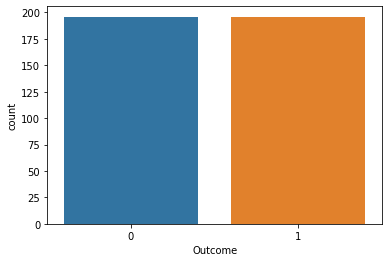

In [74]:
# print the count of each class from the target vatiables
print(oversample_train['Outcome'].value_counts())

# plot the count of each class from the target vatiables
sns.countplot(x=oversample_train['Outcome'])

### Logistic Regression Modelling on Oversampled Data

In [75]:
# Separate oversampled data into X and y sets
oversample_x_train = oversample_train.drop('Outcome', axis=1)
oversample_y_train = oversample_train.Outcome

In [76]:
# Fit model on undersampled data

oversample_LR = LogisticRegression (solver = 'lbfgs', max_iter = 1000) 

start_time = time.time()
oversample_LR.fit(oversample_x_train, oversample_y_train)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
logTrainTimeOverSampling = duration

print("For Logistic Regression, training the model takes %s seconds." %duration)

For Logistic Regression, training the model takes 0.03798651695251465 seconds.


In [77]:
# Make predictions on test sets
start_time = time.time()
y_pred = oversample_LR.predict(x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
logAccuracyScoreOverSampling = accuracy_score(y_test, y_pred)
logTimeOverSampling = duration

print('For Logistic Regression, accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print("For Logistic Regression, prediction takes %s seconds." %duration)

For Logistic Regression, accuracy score: 0.7551020408163265
For Logistic Regression, prediction takes 0.0019996166229248047 seconds.


In [78]:
# Display the model's confusion matrix
confusion_matrix (y_test, y_pred)

array([[53, 13],
       [11, 21]], dtype=int64)

In [79]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        66
           1       0.62      0.66      0.64        32

    accuracy                           0.76        98
   macro avg       0.72      0.73      0.73        98
weighted avg       0.76      0.76      0.76        98



### Decision Tree Modelling  on Oversampled Data

0.7346938775510204
0.6428571428571429
0.8163265306122449
0.7755102040816326
0.7551020408163265
0.7551020408163265
0.7653061224489796
0.7244897959183674
0.7346938775510204
0.7244897959183674
0.7040816326530612
0.7040816326530612
0.7040816326530612
0.7040816326530612


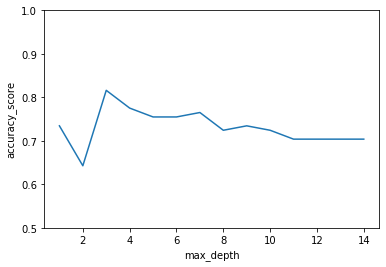

In [80]:
# use different maximum depth of the tree
depth_array = np.arange(1, 15, 1)

accuracies = []
for i in depth_array:
    dect = DecisionTreeClassifier(max_depth = i, random_state=42)
    dect.fit(oversample_x_train, oversample_y_train)
    accuracy=accuracy_score(y_test, dect.predict(x_test))
    print(accuracy)
    accuracies.append(accuracy)

plt.plot(depth_array, accuracies)
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.ylim(0.5,1)
plt.show()
# When maximum depth is 3 , the accuracy is the highest
# Too much depth may cause overfitting and if we feed a different set of test data, the prediction may be not good
# Next we will use max_depth = 3 to train the model.

In [81]:
# Fit model on oversampled data
oversample_DT = DecisionTreeClassifier(max_depth = 3, random_state=42)

start_time = time.time()
oversample_DT.fit(oversample_x_train, oversample_y_train)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
DCTrainTimeOverSampling = duration

print("For Decision Tree, Duration of training model takes %s seconds" %duration)

For Decision Tree, Duration of training model takes 0.0029985904693603516 seconds


In [82]:
# Make predictions on test sets
start_time = time.time()
y_pred = oversample_DT.predict(x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
DCAccuracyScoreOverSampling = accuracy_score(y_test, y_pred)
DCTimeOverSampling = duration

print('For Decision Tree,Accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print("For Decision Tree, Duration of predicting model takes %s seconds" %duration)

For Decision Tree,Accuracy score: 0.8163265306122449
For Decision Tree, Duration of predicting model takes 0.002000570297241211 seconds


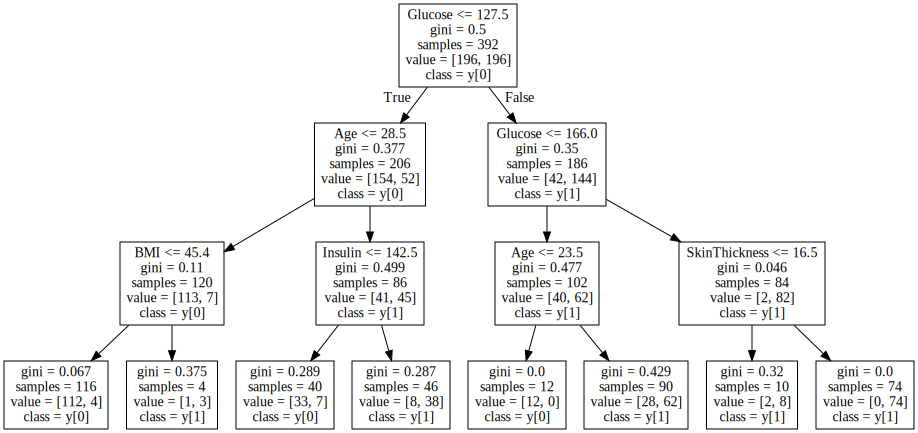

In [83]:
# When maximum depth = 3 , the accuracy 0.816 is much higher than other models,
# Let's plot the tree to have a look of the classification results

# show the decision tree model
# import graphviz and sklearn.tree first


Source(tree.export_graphviz(oversample_DT, out_file=None, class_names=True, feature_names= oversample_x_train.columns)) # display the tree, with no output file

In [84]:
# Display the model's confusion matrix
confusion_matrix (y_test, y_pred)

array([[55, 11],
       [ 7, 25]], dtype=int64)

In [85]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        66
           1       0.69      0.78      0.74        32

    accuracy                           0.82        98
   macro avg       0.79      0.81      0.80        98
weighted avg       0.82      0.82      0.82        98



### KNN Modelling on Oversampled Data

In [86]:
# we can change k value to 1 - 20, and check the accuracy score
# Then we can choose the optimized k value

# Set the various k values in an array
k_array=np.arange(1,21,2) 
k_array

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

k = 1 and accuracy = 0.6632653061224489
k = 3 and accuracy = 0.673469387755102
k = 5 and accuracy = 0.6632653061224489
k = 7 and accuracy = 0.6632653061224489
k = 9 and accuracy = 0.6836734693877551
k = 11 and accuracy = 0.6938775510204082
k = 13 and accuracy = 0.6836734693877551
k = 15 and accuracy = 0.6836734693877551
k = 17 and accuracy = 0.7040816326530612
k = 19 and accuracy = 0.7040816326530612

The number of neighbours with the highest accuracy for K-NN is 17  and the corresponding accuracy is  0.7040816326530612


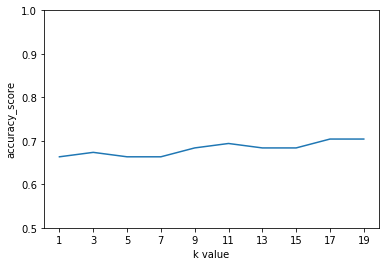

In [87]:
# Finding k with the highest accuracy for values in k_array

k_max = 0
ac_max = 0
accuracies = []

for k in k_array:  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(oversample_x_train, oversample_y_train)
    ac = accuracy_score(y_test, knn.predict(x_test))
    accuracies.append(ac)
    if (ac > ac_max):
        k_max = k
        ac_max = ac
    print("k =", k, "and accuracy =", ac)
    
    
print("")
print("The number of neighbours with the highest accuracy for K-NN is", k_max, " and the corresponding accuracy is ", ac_max)


x=[1, 3, 5, 7,  9, 11, 13, 15, 17, 19]

plt.plot(k_array, accuracies)
plt.xlabel('k value')
plt.ylabel('accuracy_score')
plt.xticks(x)
plt.ylim(0.5, 1)
plt.show()
#Larger values of k generally reduces effect of the noise on the classification,
# but make boundaries between classes less distinct. Let's train the model with k that results in the highest accuracy.

In [88]:
# Fit model on oversampled data
# Notice that high k can make boundaries between classes less distinct

oversample_KNN = KNeighborsClassifier(n_neighbors=k_max)

start_time = time.time()
oversample_KNN.fit(oversample_x_train, oversample_y_train)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
KNNTrainTimeOverSampling = duration

print("For KNN, training the model takes %s seconds." %duration)

For KNN, training the model takes 0.00299835205078125 seconds.


In [89]:
# Make predictions on test sets
start_time = time.time()
y_pred = oversample_KNN.predict(x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
KNNAccuracyScoreOverSampling = accuracy_score(y_test, y_pred)
KNNTimeOverSampling = duration

print('For KNN, accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print("For KNN, prediction takes %s seconds." %duration)

For KNN, accuracy score: 0.7040816326530612
For KNN, prediction takes 0.0050106048583984375 seconds.


In [90]:
# Display the model's confusion matrix
confusion_matrix (y_test, y_pred)

array([[48, 18],
       [11, 21]], dtype=int64)

In [91]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        66
           1       0.54      0.66      0.59        32

    accuracy                           0.70        98
   macro avg       0.68      0.69      0.68        98
weighted avg       0.72      0.70      0.71        98



### Observations

In [92]:
#Summary of Accuracy Scores
dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Accuracy(cleansed data)' : [logAccuracyScoreBeforeSampling, DCAccuracyScoreBeforeSampling, KNNAccuracyScoreBeforeSampling],
        'Accuracy(under-sampled)' : [logAccuracyScoreUnderSampling, DCAccuracyScoreUnderSampling, KNNAccuracyScoreUnderSampling],
        'Accuracy(over-sampled)' : [logAccuracyScoreOverSampling, DCAccuracyScoreOverSampling, KNNAccuracyScoreOverSampling],
       }
summaryScore = pd.DataFrame(dict)
display(summaryScore)

,Classification Models,Accuracy(cleansed data),Accuracy(under-sampled),Accuracy(over-sampled)
0,Logistic Regression,0.744898,0.714286,0.755102
1,Decision Tree,0.755102,0.724490,0.816327
2,KNN,0.734694,0.765306,0.704082


From the confusion matrix and classification reports, again we find that all the three models are able to predict minority classes better. 
Noticeably, the accuracy score of Decision tree has increased a lot. The confusion matrix and classification report also show that it predicts both the minority class and the majority class better as compared to cleansed data. The oversampling technique we adopted benefits Decision Tree the most but is not beneficial for KNN.

<span id='4.2.3'> <h3><font color=orange> 4.2.3 SMOTE (Synthetic Minority Oversampling Technique) </font></h3> </span> 

SMOTE stands for Synthetic Minority Oversampling Technique — it consists of creating or synthesizing elements or samples from the minority class rather than creating copies based on those that exist already. This is used to avoid model overfitting.

### Data re-sampling

In [93]:
# Synthesize minority class datapoints using SMOTE
sm = SMOTE(random_state=42, sampling_strategy='minority')
smote_x_train, smote_y_train = sm.fit_resample(x_train, y_train)

In [94]:
smote_y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: Outcome, dtype: float64

Let's look at the class distributions of oversampling training set. The original training set contains 196 samples for class 0 and 98 samples for class 1, now we have equal number of samples for both classes: 196.

0    196
1    196
Name: Outcome, dtype: int64


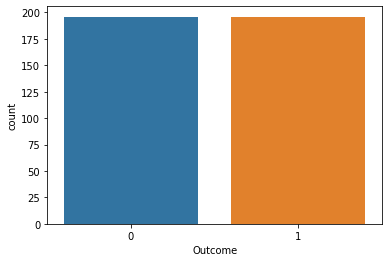

In [95]:
# print the count of each class from the target vatiables
print(smote_y_train.value_counts())

# plot the count of each class from the target vatiables
sns.countplot(x=smote_y_train)

We’ve got our evenly distributed classes. Now we can test it on the classifier.

### Logistic Regression Modelling on SMOTE Oversampled Data

In [96]:
# Fit model on undersampled data

smote_LR = LogisticRegression (solver = 'lbfgs', max_iter = 1000) 

start_time = time.time()
smote_LR.fit(smote_x_train, smote_y_train)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
logTrainTimeSMOTE = duration

print("For Logistic Regression, training the model takes %s seconds." %duration)

For Logistic Regression, training the model takes 0.03698587417602539 seconds.


In [97]:
# Make predictions on test sets
start_time = time.time()
y_pred = smote_LR.predict(x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
logAccuracyScoreSMOTE = accuracy_score(y_test, y_pred)
logTimeSMOTE = duration

print('For Logistic Regression, accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print("For Logistic Regression, prediction takes %s seconds." %duration)

For Logistic Regression, accuracy score: 0.7448979591836735
For Logistic Regression, prediction takes 0.0019986629486083984 seconds.


In [98]:
# Display the model's confusion matrix
confusion_matrix (y_test, y_pred)

array([[52, 14],
       [11, 21]], dtype=int64)

In [99]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        66
           1       0.60      0.66      0.63        32

    accuracy                           0.74        98
   macro avg       0.71      0.72      0.72        98
weighted avg       0.75      0.74      0.75        98



### Decision Tree Modelling on SMOTE Oversampled Data

0.6530612244897959
0.6632653061224489
0.673469387755102
0.673469387755102
0.7448979591836735
0.6632653061224489
0.7040816326530612
0.7244897959183674
0.7142857142857143
0.7142857142857143
0.7244897959183674
0.7244897959183674
0.7346938775510204
0.7346938775510204


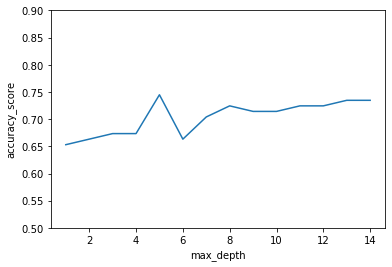

In [100]:
# use different maximum depth of the tree
depth_array = np.arange(1, 15, 1)

accuracies = []
for i in depth_array:
    dect = DecisionTreeClassifier(max_depth = i, random_state=42)
    dect.fit(smote_x_train, smote_y_train)
    accuracy=accuracy_score(y_test, dect.predict(x_test))
    print(accuracy)
    accuracies.append(accuracy)

plt.plot(depth_array, accuracies)
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.ylim(0.5,0.9)
plt.show()
#  when maximum depth comes to  5 , the accuracy is the highgest
# too many depth may cause overfitting and if we feed a different set of test data, the prediction may be not good
# Next we will use max_depth = 5 to train the model.

In [101]:
# Fit model on oversampled data
smote_DT = DecisionTreeClassifier(max_depth = 5, random_state=42)

start_time = time.time()
smote_DT.fit(smote_x_train, smote_y_train)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
DCTrainTimeSMOTE = duration

print("For Decision Tree, training the model takes %s seconds." %duration)

For Decision Tree, training the model takes 0.0029985904693603516 seconds.


In [102]:
# Make predictions on test sets
start_time = time.time()
y_pred = smote_DT.predict(x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
DCAccuracyScoreSMOTE = accuracy_score(y_test, y_pred)
DCTimeSMOTE = duration

print('For Decision Tree, accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print("For Decision Tree, prediction takes %s seconds." %duration)

For Decision Tree, accuracy score: 0.7448979591836735
For Decision Tree, prediction takes 0.0010001659393310547 seconds.


In [103]:
# Display the model's confusion matrix
confusion_matrix (y_test, y_pred)

array([[49, 17],
       [ 8, 24]], dtype=int64)

In [104]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80        66
           1       0.59      0.75      0.66        32

    accuracy                           0.74        98
   macro avg       0.72      0.75      0.73        98
weighted avg       0.77      0.74      0.75        98



### KNN Modelling on SMOTE Oversampled Data

In [105]:
# we can change k value to 1 - 20, and check the accuracy score
# Then we can choose the optimized k value

# Set the various k values in an array
k_array=np.arange(1,21,2) 
k_array

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

k = 1 and accuracy = 0.673469387755102
k = 3 and accuracy = 0.6428571428571429
k = 5 and accuracy = 0.6530612244897959
k = 7 and accuracy = 0.6428571428571429
k = 9 and accuracy = 0.6632653061224489
k = 11 and accuracy = 0.673469387755102
k = 13 and accuracy = 0.673469387755102
k = 15 and accuracy = 0.6938775510204082
k = 17 and accuracy = 0.6938775510204082
k = 19 and accuracy = 0.6836734693877551

The number of neighbours with the highest accuracy for K-NN is 15  and the corresponding accuracy is  0.6938775510204082


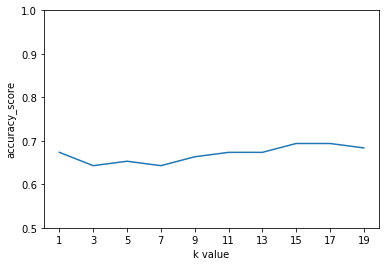

In [106]:
# Finding k with the highest accuracy for values in k_array

k_max = 0
ac_max = 0
accuracies = []

for k in k_array:  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(smote_x_train, smote_y_train)
    ac = accuracy_score(y_test, knn.predict(x_test))
    accuracies.append(ac)
    if (ac > ac_max):
        k_max = k
        ac_max = ac
    print("k =", k, "and accuracy =", ac)
    
    
print("")
print("The number of neighbours with the highest accuracy for K-NN is", k_max, " and the corresponding accuracy is ", ac_max)


x=[1, 3, 5, 7,  9, 11, 13, 15, 17, 19]

plt.plot(k_array, accuracies)
plt.xlabel('k value')
plt.ylabel('accuracy_score')
plt.xticks(x)
plt.ylim(0.5, 1)
plt.show()
#Larger values of k generally reduces effect of the noise on the classification,
# but make boundaries between classes less distinct. Let's train the model with k that results in the highest accuracy.

In [107]:
# Fit model on oversampled data
# Notice that high k can make boundaries between classes less distinct

smote_KNN = KNeighborsClassifier(n_neighbors=k_max)

start_time = time.time()
smote_KNN.fit(smote_x_train, smote_y_train)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
KNNTrainTimeSMOTE = duration

print("For KNN, training the model takes %s seconds" %duration)

For KNN, training the model takes 0.0029985904693603516 seconds


In [108]:
# Make predictions on test sets
start_time = time.time()
y_pred = smote_KNN.predict(x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
KNNAccuracyScoreSMOTE = accuracy_score(y_test, y_pred)
KNNTimeSMOTE = duration

print('For KNN, accuracy score: ' + str(accuracy_score(y_test, y_pred)))
print("For KNN, prediction takes %s seconds" %duration)

For KNN, accuracy score: 0.6938775510204082
For KNN, prediction takes 0.004986286163330078 seconds


In [109]:
# Display the model's confusion matrix
confusion_matrix (y_test, y_pred)

array([[47, 19],
       [11, 21]], dtype=int64)

In [110]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        66
           1       0.53      0.66      0.58        32

    accuracy                           0.69        98
   macro avg       0.67      0.68      0.67        98
weighted avg       0.72      0.69      0.70        98



### Observations

In [111]:
#Summary of Accuracy Scores
dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Accuracy(cleansed data)' : [logAccuracyScoreBeforeSampling, DCAccuracyScoreBeforeSampling, KNNAccuracyScoreBeforeSampling],
        'Accuracy(under-sampled)' : [logAccuracyScoreUnderSampling, DCAccuracyScoreUnderSampling, KNNAccuracyScoreUnderSampling],
        'Accuracy(over-sampled)' : [logAccuracyScoreOverSampling, DCAccuracyScoreOverSampling, KNNAccuracyScoreOverSampling],
        'Accuracy(SMOTE over-sampled)' : [logAccuracyScoreSMOTE, DCAccuracyScoreSMOTE, KNNAccuracyScoreSMOTE],
       }
summaryScore = pd.DataFrame(dict)
display(summaryScore)

,Classification Models,Accuracy(cleansed data),Accuracy(under-sampled),Accuracy(over-sampled),Accuracy(SMOTE over-sampled)
0,Logistic Regression,0.744898,0.714286,0.755102,0.744898
1,Decision Tree,0.755102,0.724490,0.816327,0.744898
2,KNN,0.734694,0.765306,0.704082,0.693878


From the confusion matrix and classification reports after SMOTE oversampling, we again find that all the three models are able to predict the minority class better. However, this comes at the cost of less accurate predictions for the majority class.

We used two oversampling techniques in this project. The first oversampling technique is sklearn.utils.resample, and the second is SMOTE. After using SMOTE to oversample the data, the accuracy scores for all three machine learning methods oversampling were lower as compared to the scores resulting from the sklearn.utils.resample oversampling technique. From this, we could see that the sklearn.utils.resample resampling method is better at producing more accurate results than SMOTE for this particular dataset. The takeaway here is that different resampling methods may result in noticeably different modelling results.

<span id='4.2.4'> <h3><font color=orange> 4.2.4 Impact of Data Sampling </font></h3> </span> 

We summarise the training duration and predition durations in tables as well.

In [112]:
#Summary of Training Duration
dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Training Duration(cleansed data)' : [logTrainTimeBeforeSampling, DCTrainTimeBeforeSampling, KNNTrainTimeBeforeSampling],
        'Training Duration(under-sampled)' : [logTrainTimeUnderSampling, DCTrainTimeUnderSampling, KNNTrainTimeUnderSampling],
        'Training Duration(over-sampled)' : [logTrainTimeOverSampling, DCTrainTimeOverSampling, KNNTrainTimeOverSampling],
        'Training Duration(SMOTE over-sampled)' : [logTrainTimeSMOTE, DCTrainTimeSMOTE, KNNTrainTimeSMOTE],
       }
summaryPredictionSpeed = pd.DataFrame(dict)
display(summaryPredictionSpeed)

,Classification Models,Training Duration(cleansed data),Training Duration(under-sampled),Training Duration(over-sampled),Training Duration(SMOTE over-sampled)
0,Logistic Regression,0.037987,0.045273,0.037987,0.036986
1,Decision Tree,0.001999,0.002999,0.002999,0.002999
2,KNN,0.002018,0.001999,0.002998,0.002999


In [113]:
#Summary of Prediction Speed
dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Prediction Duration(cleansed data)' : [logTimeBeforeSampling, DCTimeBeforeSampling, KNNTimeBeforeSampling],
        'Prediction Duration(under-sampled)' : [logTimeUnderSampling, DCTimeUnderSampling, KNNTimeUnderSampling],
        'Prediction Duration(over-sampled)' : [logTimeOverSampling, DCTimeOverSampling, KNNTimeOverSampling],
        'Prediction Duration(SMOTE over-sampled)' : [logTimeSMOTE, DCTimeSMOTE, KNNTimeSMOTE],
       }
summaryPredictionSpeed = pd.DataFrame(dict)
display(summaryPredictionSpeed)

,Classification Models,Prediction Duration(cleansed data),Prediction Duration(under-sampled),Prediction Duration(over-sampled),Prediction Duration(SMOTE over-sampled)
0,Logistic Regression,0.001999,0.001999,0.002000,0.001999
1,Decision Tree,0.001999,0.002000,0.002001,0.001000
2,KNN,0.005010,0.005998,0.005011,0.004986


<u>(1) Impact on prediction accuracies</u>

After we sampled the cleansed data, the models are able to predict the minority class better, but it's often at the cost of reducing the prediction accuracy for majority class. As a result, accuracy scores for the most of models have not improved, but have even decreased.

More importantly, we understood that different data sampling techniques results in different accuracy scores. Notice that oversampling may lead to model overfitting, since it will duplicate instances from minority class, while undersampling may end up leaving out important instances that provide important differences in the majority class. Ultimately, there is no one-size-fits-all method for the problem of an imbalanced dataset. We just have to try out each method and see their  effect on specific use cases and metrics.

Lastly, we observed that the Decision Tree method produced the highest accuracy score of 0.816327 at max_depth 3 as compared to other methods. This is a very good accuracy score and is an indicator that the Decision Tree method gains the most benefits from the first over-sampling method for this dataset.

<u>(2) Impact on Training Speed and Prediction Speed</u>

As we have a relatively small dataset, the training speed and prediction speed are quite fast. For a small dataset, the difference of less than a second would not be a big concern. But for larger datasets, the prediction time could cause much delay to users.

<u>(3)Conclusion</u>

Considering accuracy values and training (and prediction)time duration, it would indicate that the Decision Tree algorithm benefited the most from oversampling technique sklearn.utils.resample.

<span id='5'> <h1> <font color=darkblue>5. Impact of Feature Engineering on Modelling Results </font></h1> </span> 

Curse of Dimensionality refers to a set of problems that arise when working with high-dimensional data. The dimension of a dataset corresponds to the number of attributes/features that exist in a dataset. A dataset with a large number of attributes, generally of the order of a hundred or more, is referred to as high dimensional data. Some of the difficulties that come with high dimensional data manifest during analyzing or visualizing the data to identify patterns, and some manifest while training machine learning models. The difficulties related to training machine learning models due to high dimensional data is referred to as ‘Curse of Dimensionality’.

<span id='5.1'> <h2> <font color=orange>5.1 Modelling after Feature Selection </font></h2> </span> 

### Correlation Matrix of Cleansed Data

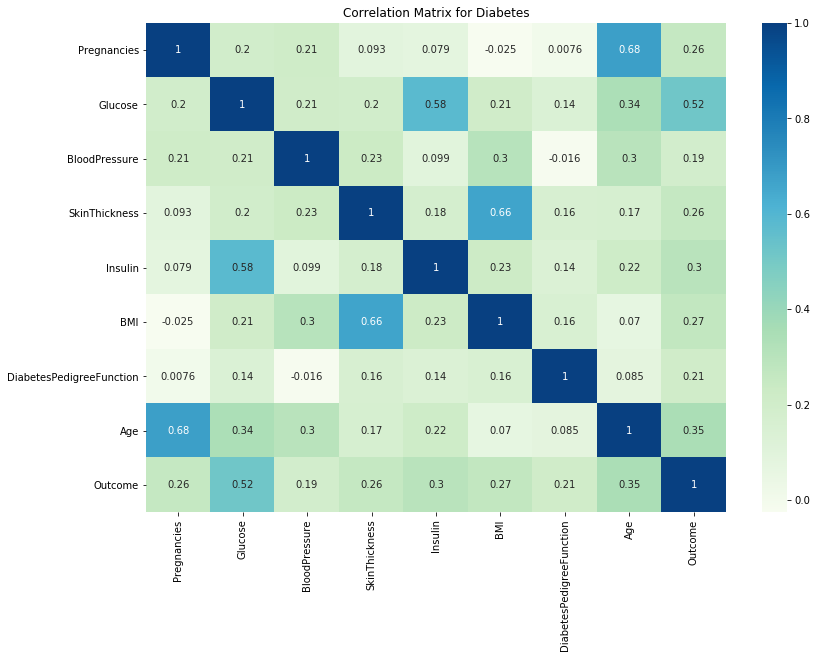

In [114]:
# Show the independent and dependent variables in table form
corr_mat = df.corr()
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(13,9))
ax = sns.heatmap(data=corr_mat, annot=True, cmap='GnBu')
plt.title("Correlation Matrix for Diabetes")
plt.show()

First, let's look at the relations between features and  the target variable 'Outcome',  'Glucose' and 'Outcome' shows the strongest relation which is 0.52, while 'Age' and 'Outcome' has the second hightest relation which is 0.35. We will set 0.35  as the criteria to extract features.

Second, let's look at the relations between different features. We can find three highly-correlated pairs: 'Insulin'and 'Glucose' has a relation of 0.58, 'Age' and 'Pregnancies' has a realtion of 0.68, 'BMI' and 'SkinThickness' has a relation of 0.66. 


### Feature Selection

In [115]:
# set the criterion to 0.35 as for the relation between features and target

target = 'Outcome'
candidates = corr_mat[target][(corr_mat[target] >= 0.35) | (corr_mat[target] <= -0.35)]
to_drop = set(corr_mat[target].index) - set(candidates.index)
candidates_df = corr_mat.drop(index=to_drop, columns=to_drop)
print('Candidates w.r.t Outcome:\n',
      candidates_df.drop(index=target)[target],
      '\n', sep='')

# We can see that features 'Glucose' and 'Age' meet the criterion

Candidates w.r.t Outcome:
Glucose    0.515703
Age        0.350804
Name: Outcome, dtype: float64



In [116]:
candidates_df

,Glucose,Age,Outcome
Glucose,1.000000,0.343641,0.515703
Age,0.343641,1.000000,0.350804
Outcome,0.515703,0.350804,1.000000


In [117]:
# skip features that are highly-related with the selected features

skip = [target]
accept = []

for entry in candidates_df.index:
    if entry not in skip and entry not in accept:
        # get a series from dataframe using 'entry' as index
        similar_to_entry_s = candidates_df.loc[entry]

        # look for other features that are highly-correlated with 'entry'
        similar_to_entry_s = similar_to_entry_s[(similar_to_entry_s >= 0.6)]

        # fetch 'Outcome' column that only contains items found in 'similar_to_entry_s'
        similar_to_target_s = candidates_df.loc[similar_to_entry_s.index][target]

        # idxmax() to get the feature name that is most correlated with 'Outcome'
        top_feature = similar_to_target_s.abs().idxmax()

        # accept the feature with max correlation against 'Outcome'
        accept.append(top_feature)

        # discard other features in 'similar_to_entry_s'
        skip += set(similar_to_entry_s.index) - {top_feature}


print('Selected Features =', accept)

Selected Features = ['Glucose', 'Age']


In [118]:
selected_x = df[accept]
print(selected_x)

     Glucose   Age
3       89.0  21.0
4      137.0  33.0
6       78.0  26.0
8      197.0  53.0
13     189.0  59.0
..       ...   ...
753    181.0  26.0
755    128.0  37.0
760     88.0  22.0
763    101.0  63.0
765    121.0  30.0

[392 rows x 2 columns]


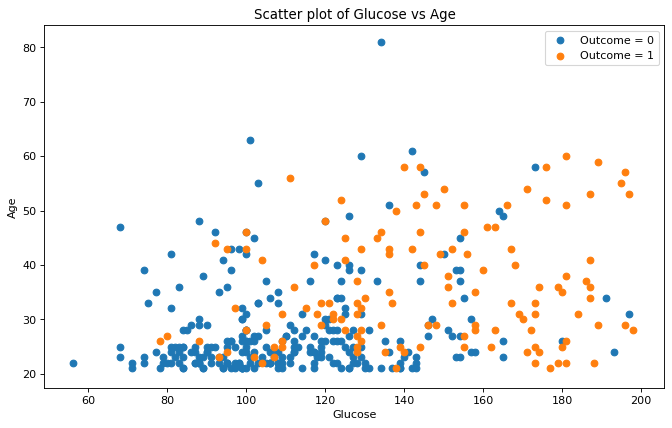

In [119]:
y = df.iloc[:,-1]
plt.figure(figsize=(10,6),dpi = 80)

for outcome in np.unique(y):
    x_by_outcome = selected_x.values[y == outcome]
    plt.scatter(x=x_by_outcome[:, 0],
                y=x_by_outcome[:, 1],
                label="Outcome = " + str(outcome))
    
plt.legend()
plt.title('Scatter plot of Glucose vs Age')
plt.xlabel(selected_x.columns[0])
plt.ylabel(selected_x.columns[1])
plt.show()

### Logistic Regression Modelling on selected data

In [120]:
selected_x_train, selected_x_test, selected_y_train, selected_y_test = train_test_split(selected_x, y, random_state = 42)

selected_x_train.head()

,Glucose,Age
519,129.0,60.0
35,103.0,33.0
137,93.0,22.0
316,99.0,30.0
18,103.0,33.0


In [121]:
# Fit model on selected data

selected_LR = LogisticRegression (solver = 'lbfgs', max_iter = 1000) 

start_time = time.time()
selected_LR.fit(selected_x_train, selected_y_train)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
logTrainTimeSelected = duration

print("For Logistic Regression, training the model takes %s seconds." %duration)

For Logistic Regression, training the model takes 0.011995792388916016 seconds.


In [122]:
# Make predictions on test sets
start_time = time.time()
selected_y_pred = selected_LR.predict(selected_x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
logAccuracyScoreSelected = accuracy_score(selected_y_test, selected_y_pred)
logTimeSelected= duration

print('For Logistic Regression, accuracy score: ' + str(accuracy_score(selected_y_test, selected_y_pred)))
print("For Logistic Regression, prediction takes %s seconds." %duration)

For Logistic Regression, accuracy score: 0.7448979591836735
For Logistic Regression, prediction takes 0.0010001659393310547 seconds.


In [123]:
# Display the model's confusion matrix
confusion_matrix (selected_y_test, selected_y_pred)

array([[58,  8],
       [17, 15]], dtype=int64)

In [124]:
print (classification_report(selected_y_test, selected_y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        66
           1       0.65      0.47      0.55        32

    accuracy                           0.74        98
   macro avg       0.71      0.67      0.68        98
weighted avg       0.73      0.74      0.73        98



### Decision Tree Modelling on selected data

0.7346938775510204
0.7040816326530612
0.7857142857142857
0.7653061224489796
0.7653061224489796
0.7448979591836735
0.7448979591836735
0.7244897959183674
0.7142857142857143
0.7142857142857143
0.7346938775510204
0.7346938775510204
0.7244897959183674
0.7346938775510204


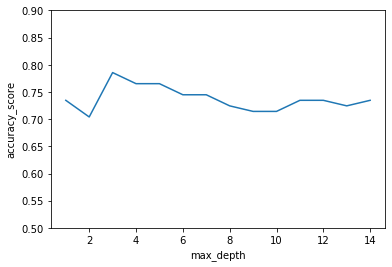

In [125]:
# use different maximum depth of the tree
depth_array = np.arange(1, 15, 1)

accuracies = []
for i in depth_array:
    dect = DecisionTreeClassifier(max_depth = i, random_state=42)
    dect.fit(selected_x_train, selected_y_train)
    accuracy=accuracy_score(selected_y_test, dect.predict(selected_x_test))
    print(accuracy)
    accuracies.append(accuracy)

plt.plot(depth_array, accuracies)
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.ylim(0.5,0.9)
plt.show()
#  when maximum depth comes to  3, the accuracy is the highgest
# too many depth may cause overfitting and if we feed a different set of test data, the prediction may be not good
# Next we will use max_depth = 3 to train the model.

In [126]:
# Fit model on selected data
selected_DT = DecisionTreeClassifier(max_depth = 5, random_state=42)

start_time = time.time()
selected_DT.fit(selected_x_train, selected_y_train)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
DCTrainTimeSelected = duration

print("For Decision Tree, training the model takes %s seconds." %duration)

For Decision Tree, training the model takes 0.0029990673065185547 seconds.


In [127]:
# Make predictions on test sets
start_time = time.time()
selected_y_pred = selected_DT.predict(selected_x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
DCAccuracyScoreSelected = accuracy_score(selected_y_test, selected_y_pred)
DCTimeSelected= duration

print('For Decision Tree, accuracy score: ' + str(accuracy_score(selected_y_test, selected_y_pred)))
print("For Decision Tree, prediction takes %s seconds." %duration)

For Decision Tree, accuracy score: 0.7653061224489796
For Decision Tree, prediction takes 0.0009996891021728516 seconds.


In [128]:
# Display the model's confusion matrix
confusion_matrix (selected_y_test, selected_y_pred)

array([[56, 10],
       [13, 19]], dtype=int64)

In [129]:
print (classification_report(selected_y_test, selected_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        66
           1       0.66      0.59      0.62        32

    accuracy                           0.77        98
   macro avg       0.73      0.72      0.73        98
weighted avg       0.76      0.77      0.76        98



### KNN Modelling on selected data

In [130]:
# we can change k value to 1 - 20, and check the accuracy score
# Then we can choose the optimized k value

# Set the various k values in an array
k_array=np.arange(1,21,2) 
k_array

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

k = 1 and accuracy = 0.7244897959183674
k = 3 and accuracy = 0.6836734693877551
k = 5 and accuracy = 0.6938775510204082
k = 7 and accuracy = 0.7142857142857143
k = 9 and accuracy = 0.7244897959183674
k = 11 and accuracy = 0.7346938775510204
k = 13 and accuracy = 0.7653061224489796
k = 15 and accuracy = 0.7448979591836735
k = 17 and accuracy = 0.7551020408163265
k = 19 and accuracy = 0.7653061224489796

The number of neighbours with the highest accuracy for K-NN is 13  and the corresponding accuracy is  0.7653061224489796


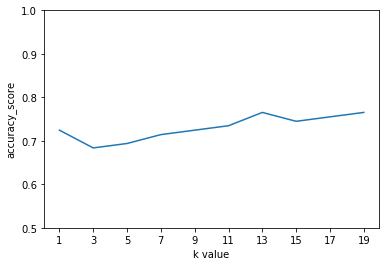

In [131]:
# Finding k with the highest accuracy for values in k_array

k_max = 0
ac_max = 0
accuracies = []

for k in k_array:  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(selected_x_train, selected_y_train)
    ac = accuracy_score(selected_y_test, knn.predict(selected_x_test))
    accuracies.append(ac)
    if (ac > ac_max):
        k_max = k
        ac_max = ac
    print("k =", k, "and accuracy =", ac)
    
    
print("")
print("The number of neighbours with the highest accuracy for K-NN is", k_max, " and the corresponding accuracy is ", ac_max)


x=[1, 3, 5, 7,  9, 11, 13, 15, 17, 19]

plt.plot(k_array, accuracies)
plt.xlabel('k value')
plt.ylabel('accuracy_score')
plt.xticks(x)
plt.ylim(0.5, 1)
plt.show()
#Larger values of k generally reduces effect of the noise on the classification,
# but make boundaries between classes less distinct. Let's train the model with k that results in the highest accuracy.

In [132]:
# Fit model on selected data
# Notice that high k can make boundaries between classes less distinct

selected_KNN = KNeighborsClassifier(n_neighbors=k_max)

start_time = time.time()
selected_KNN.fit(selected_x_train, selected_y_train)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
KNNTrainTimeSelected = duration

print("For KNN, training the model takes %s seconds." %duration)

For KNN, training the model takes 0.0019989013671875 seconds.


In [133]:
# Make predictions on test sets
start_time = time.time()
selected_y_pred = selected_KNN.predict(selected_x_test)
end_time = time.time()
duration = end_time - start_time

# the defined variables are used for populating data into tables when we summarize the modelling results
KNNAccuracyScoreSelected = accuracy_score(selected_y_test, selected_y_pred)
KNNTimeSelected = duration

print('For KNN, accuracy score: ' + str(accuracy_score(selected_y_test, selected_y_pred)))
print("For KNN, prediction takes %s seconds." %duration)

For KNN, accuracy score: 0.7653061224489796
For KNN, prediction takes 0.005998134613037109 seconds.


In [134]:
# Display the model's confusion matrix
confusion_matrix (selected_y_test, selected_y_pred)

array([[60,  6],
       [17, 15]], dtype=int64)

In [135]:
print (classification_report(selected_y_test, selected_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        66
           1       0.71      0.47      0.57        32

    accuracy                           0.77        98
   macro avg       0.75      0.69      0.70        98
weighted avg       0.76      0.77      0.75        98



<h3><font color=blue> Impact of Feature Selection</font></h3>

In [136]:
#Summary of Accuracy Scores
dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Accuracy(cleansed data)' : [logAccuracyScoreBeforeSampling, DCAccuracyScoreBeforeSampling, KNNAccuracyScoreBeforeSampling],
        'Accuracy(selected features )' : [logAccuracyScoreSelected, DCAccuracyScoreSelected, KNNAccuracyScoreSelected],
       }
summaryScore = pd.DataFrame(dict)
display(summaryScore)

,Classification Models,Accuracy(cleansed data),Accuracy(selected features )
0,Logistic Regression,0.744898,0.744898
1,Decision Tree,0.755102,0.765306
2,KNN,0.734694,0.765306


In [137]:
#Summary of Training Duration
dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Training Duration(cleansed data)' : [logTrainTimeBeforeSampling, DCTrainTimeBeforeSampling, KNNTrainTimeBeforeSampling],
        'Training Duration(selected features)' : [logTrainTimeSelected, DCTrainTimeSelected, KNNTrainTimeSelected]
       }
summaryPredictionSpeed = pd.DataFrame(dict)
display(summaryPredictionSpeed)

,Classification Models,Training Duration(cleansed data),Training Duration(selected features)
0,Logistic Regression,0.037987,0.011996
1,Decision Tree,0.001999,0.002999
2,KNN,0.002018,0.001999


In [138]:
#Summary of Prediction Speed
dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Prediction Speed(cleansed data)' : [logTimeBeforeSampling, DCTimeBeforeSampling, KNNTimeBeforeSampling],
        'Prediction Speed(selected features)' : [logTimeSelected, DCTimeSelected, KNNTimeSelected]
       }
summaryPredictionSpeed = pd.DataFrame(dict)
display(summaryPredictionSpeed)

,Classification Models,Prediction Speed(cleansed data),Prediction Speed(selected features)
0,Logistic Regression,0.001999,0.001000
1,Decision Tree,0.001999,0.001000
2,KNN,0.005010,0.005998


<u>(1) Impact on prediction accuraices</u>

After performing feature selection, the prediction accuracy increased slightly for Decision Tree and KNN while it kept unchanged for Logistic Regression. If we look at the confusion matrix and classification reports, we can find that all the three algorithms can predict Class 0 (the majority) better but predict Class 1 (the minority) worse as compared to the cleansed data. Again, the effect is not significant.

The correlation matrix demonstrated that most of the correlations between the predictors and the dependent variable have a moderate to weak linear relationship (mostly < +-0.5), which may explain the non-significant (<0.1) modifications in accuracy values as they do not cause much of an impact in training the model to learn.

<u>(2) Impact on Train Speed and Prediction Speed</u>

Duration for the model training and predictions has also seen a decrease in time taken due to the reduction of 8 original independent variables to 2.

<u>(3)Conclusion</u>

These modifications to the accuracy values and training (and prediction)time duration would indicate that the KNN algorithm benefited the most from Feature Selection. 

<span id='5.2'> <h2> <font color=orange>5.2 Modelling after Feature Extraction </font></h2> </span> 

### Import and Scale the Data

In [139]:
#Excluding the outcome
X = df.iloc[:,:-1]

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59.0


In [140]:
#Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[-0.7174265  -1.09104581 -0.37365481 ... -0.710421   -1.03187632
  -0.9682991 ]
 [-1.02921274  0.46631407 -2.45696436 ...  1.42673006  5.11511079
   0.2095853 ]
 [-0.09385402 -1.44794079 -1.65569146 ... -0.29723846 -0.79712575
  -0.47751393]
 ...
 [-0.40564026 -1.12349081 -1.01467313 ... -0.66767798  0.70411863
  -0.87014206]
 [ 2.08864966 -0.70170584  0.42761809 ... -0.02653266 -1.0202837
   3.15429628]
 [ 0.52971846 -0.05280589  0.10710893 ... -0.9811268  -0.80582021
  -0.0848858 ]]


### Principal Component Analysis

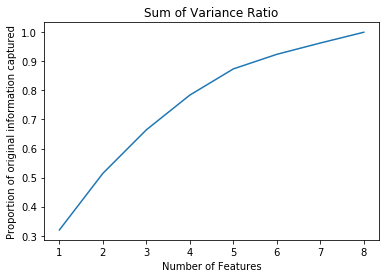

In [141]:
#PCA for 1 to 8 features

pca = []
newfeatures = []
varianceratiosum = []
varianceratio = []

for i in range(8):
    pcaworking = PCA(n_components = (i+1))
    pca.append(pcaworking)
    newfeatures.append(pcaworking.fit_transform(X_scaled))
    
for i in range(8):
    varianceratiosum.append(pca[i].explained_variance_ratio_.sum())
    varianceratio.append(pca[i].explained_variance_ratio_)
    
plt.plot(np.arange(1,9), varianceratiosum)
plt.title('Sum of Variance Ratio')
plt.xlabel('Number of Features') 
plt.ylabel('Proportion of original information captured')
plt.show()

As we can see from the Sum of Variance Ratio curve, the total explained variance increases as the number of principal components chosen increases. This is expected.

For this project, we have decided that we will set our explained variance cut-off at 0.8. This is reasonably high and we do not lose too much information. Cutting off the explained variance at 0.8 also allows us to have a choice in the number of features we select (from 5 to 8), which allows us to have some leeway to optimise the number of features selected for our model for higher accuracy.

Since the raw dataset only has 8 features,there should be no obvious difference in the computation requirements regardless of the number of principal components. Our testing has also proven this to be true. As such, there is no benefits in terms of time savings, and the main criterion we take into consideration would be the accuracy.

### Logistic Regression Modelling on Extracted Features

In [142]:
#Track time taken and accuracy
LRtimetakentrain = []
LRtimetakenpredict = []
LRaccuracyscores = []
LRconfusionmatrix = []
LRclassificationreport = []

#Settings that are not affected by loop
y = df['Outcome'].values
logReg = LogisticRegression (solver = 'lbfgs', max_iter = 1000)

#Looping to do LR and get results for 5 to 8 features as created by PCA
for i in range(4,8):
    X = newfeatures[i]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    
    start_time = time.time()
    logReg.fit(X_train, y_train)
    end_time = time.time()
    duration = end_time - start_time
    LRtimetakentrain.append(duration)

    start_time = time.time()
    y_pred = logReg.predict(X_test)
    end_time = time.time() 
    duration = end_time - start_time
    LRtimetakenpredict.append(duration)

    LRaccuracyscores.append(accuracy_score(y_test,y_pred))
    LRconfusionmatrix.append(confusion_matrix(y_test, y_pred))
    LRclassificationreport.append(classification_report(y_test, y_pred))

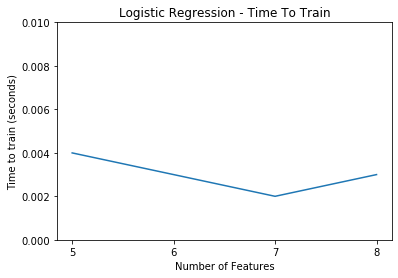

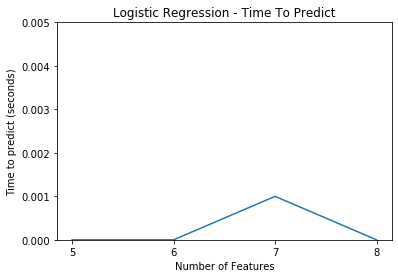

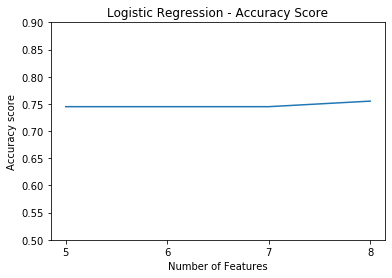

Confusion matrix for number of features = 8
[[56 10]
 [14 18]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        66
           1       0.64      0.56      0.60        32

    accuracy                           0.76        98
   macro avg       0.72      0.71      0.71        98
weighted avg       0.75      0.76      0.75        98



In [143]:
#Time to train vs number of features
plt.plot(np.arange(5,9), LRtimetakentrain)
plt.title('Logistic Regression - Time To Train')
plt.xlabel('Number of Features') 
plt.ylabel('Time to train (seconds)')
plt.xticks(range(5,9))
plt.ylim(0,0.01)
plt.show() 

#Time to predict vs number of features
plt.plot(np.arange(5,9), LRtimetakenpredict)
plt.title('Logistic Regression - Time To Predict')
plt.xlabel('Number of Features')
plt.ylabel('Time to predict (seconds)')
plt.xticks(range(5,9))
plt.ylim(0,0.005)
plt.show() 

#Accuracy score vs number of features
plt.plot(np.arange(5,9), LRaccuracyscores)
plt.title('Logistic Regression - Accuracy Score')
plt.xlabel('Number of Features') 
plt.ylabel('Accuracy score')
plt.xticks(range(5,9))
plt.ylim(0.5,0.9)
plt.show()

#Accuracy info for number of features with highest data score
print('Confusion matrix for number of features =', LRaccuracyscores.index(max(LRaccuracyscores))+5)
print (LRconfusionmatrix[LRaccuracyscores.index(max(LRaccuracyscores))])
print (LRclassificationreport[LRaccuracyscores.index(max(LRaccuracyscores))])

### Decision Tree Modelling on Extracted Features

In order to compare the difference feature engineering brings, we use the value of max_depth = 4 in alignment with cleansed data modelling.

In [144]:
#Track time taken and accuracy
DTtimetakentrain = []
DTtimetakenpredict = []
DTaccuracyscores = []
DTconfusionmatrix = []
DTclassificationreport = []

#Settings that are not affected by loop
y = df['Outcome'].values
dt = DecisionTreeClassifier(max_depth = 4, random_state = 42)

#Looping to do DT and get results for 5 to 8 features as created by PCA
for i in range(4,8):
    X = newfeatures[i]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
        
    start_time = time.time()
    dt.fit(X_train, y_train)
    end_time = time.time()
    duration = end_time - start_time
    DTtimetakentrain.append(duration)

    start_time = time.time()
    y_pred = dt.predict(X_test)
    end_time = time.time() 
    duration = end_time - start_time
    DTtimetakenpredict.append(duration)

    DTaccuracyscores.append(accuracy_score(y_test,y_pred))
    DTconfusionmatrix.append(confusion_matrix(y_test, y_pred))
    DTclassificationreport.append(classification_report(y_test, y_pred))

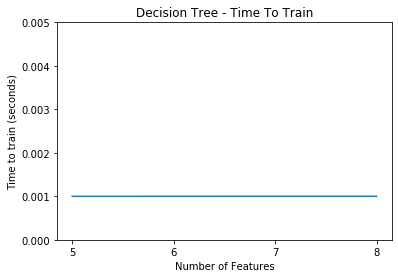

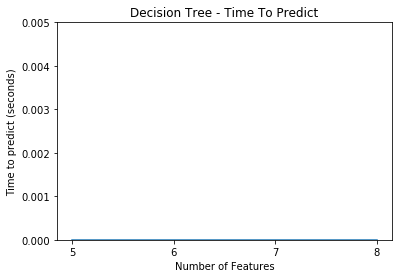

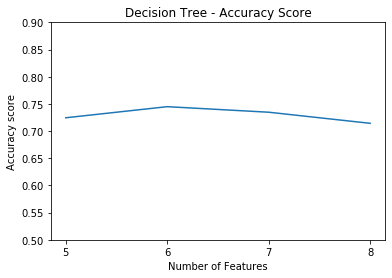

Confusion matrix for number of features = 6
[[55 11]
 [14 18]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        66
           1       0.62      0.56      0.59        32

    accuracy                           0.74        98
   macro avg       0.71      0.70      0.70        98
weighted avg       0.74      0.74      0.74        98



In [145]:
#Time to train vs number of features
plt.plot(np.arange(5,9), DTtimetakentrain)
plt.title('Decision Tree - Time To Train')
plt.xlabel('Number of Features') 
plt.ylabel('Time to train (seconds)')
plt.xticks(range(5,9))
plt.ylim(0,0.005)
plt.show() 

#Time to predict vs number of features
plt.plot(np.arange(5,9), DTtimetakenpredict)
plt.title('Decision Tree - Time To Predict')
plt.xlabel('Number of Features')
plt.ylabel('Time to predict (seconds)')
plt.xticks(range(5,9))
plt.ylim(0,0.005)
plt.show() 

#Accuracy score vs number of features
plt.plot(np.arange(5,9), DTaccuracyscores)
plt.title('Decision Tree - Accuracy Score')
plt.xlabel('Number of Features') 
plt.ylabel('Accuracy score')
plt.xticks(range(5,9))
plt.ylim(0.5, 0.9)
plt.show()

#Accuracy info for number of features with highest data score
print('Confusion matrix for number of features =', DTaccuracyscores.index(max(DTaccuracyscores))+5)
print (DTconfusionmatrix[DTaccuracyscores.index(max(DTaccuracyscores))])
print (DTclassificationreport[DTaccuracyscores.index(max(DTaccuracyscores))])

### KNN Modelling on Extracted Features

In order to compare the difference feature engineering brings, we use the value of k = 9 in alignment with cleansed data modelling.

In [146]:
#Track time taken and accuracy
KNNtimetakentrain = []
KNNtimetakenpredict = []
KNNaccuracyscores = []
KNNconfusionmatrix = []
KNNclassificationreport = []

#Settings that are not affected by loop
y = df['Outcome'].values
knn_model =  KNeighborsClassifier(n_neighbors = 9)

#Looping to do KNN and get results for 5 to 8 features as created by PCA
for i in range(4,8):
    X = newfeatures[i]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
        
    start_time = time.time()
    knn_model.fit(X_train, y_train)
    end_time = time.time()
    duration = end_time - start_time
    KNNtimetakentrain.append(duration)

    start_time = time.time()
    y_pred = knn_model.predict(X_test)
    end_time = time.time() 
    duration = end_time - start_time
    KNNtimetakenpredict.append(duration)

    KNNaccuracyscores.append(accuracy_score(y_test,y_pred))
    KNNconfusionmatrix.append(confusion_matrix(y_test, y_pred))
    KNNclassificationreport.append(classification_report(y_test, y_pred))

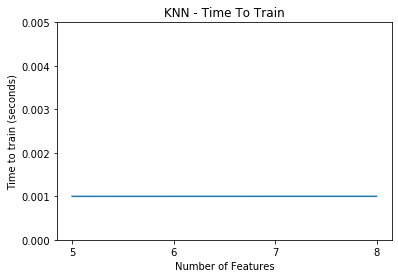

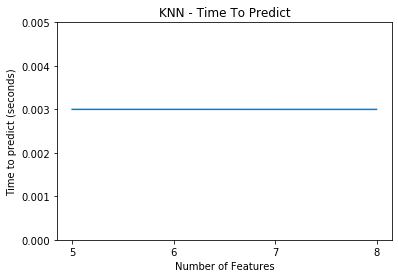

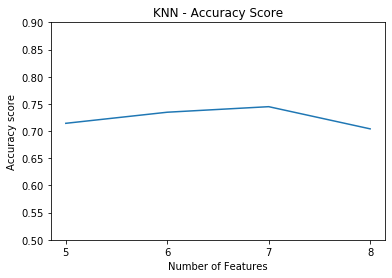

Confusion matrix for number of features = 7
[[54 12]
 [13 19]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        66
           1       0.61      0.59      0.60        32

    accuracy                           0.74        98
   macro avg       0.71      0.71      0.71        98
weighted avg       0.74      0.74      0.74        98



In [147]:
#Time to train vs number of features
plt.plot(np.arange(5,9), KNNtimetakentrain)
plt.title('KNN - Time To Train')
plt.xlabel('Number of Features') 
plt.ylabel('Time to train (seconds)')
plt.xticks(range(5,9))
plt.ylim(0,0.005)
plt.show() 

#Time to predict vs number of features
plt.plot(np.arange(5,9), KNNtimetakenpredict)
plt.title('KNN - Time To Predict')
plt.xlabel('Number of Features')
plt.ylabel('Time to predict (seconds)')
plt.xticks(range(5,9))
plt.ylim(0,0.005)
plt.show() 

#Accuracy score vs number of features
plt.plot(np.arange(5,9), KNNaccuracyscores)
plt.title('KNN - Accuracy Score')
plt.xlabel('Number of Features') 
plt.ylabel('Accuracy score')
plt.xticks(range(5,9))
plt.ylim(0.5,0.9)
plt.show()

#Accuracy info for number of features with highest data score
print('Confusion matrix for number of features =', KNNaccuracyscores.index(max(KNNaccuracyscores))+5)
print (KNNconfusionmatrix[KNNaccuracyscores.index(max(KNNaccuracyscores))])
print (KNNclassificationreport[KNNaccuracyscores.index(max(KNNaccuracyscores))])

<h3><font color=blue> Impact of Feature Extraction</font></h3>

In [148]:
#Summary of Accuracies

dict = {'Classification Models' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Accuracy(cleansed data)' : [logAccuracyScoreBeforeSampling, DCAccuracyScoreBeforeSampling, KNNAccuracyScoreBeforeSampling],
        'Accuracy(feature-extracted data)' : [max(LRaccuracyscores), max(DTaccuracyscores), max(KNNaccuracyscores)],
        'Number of features for highest accuracy': [LRaccuracyscores.index(max(LRaccuracyscores))+5, DTaccuracyscores.index(max(DTaccuracyscores))+5, KNNaccuracyscores.index(max(KNNaccuracyscores))+5]
       }
summaryPredictionSpeed = pd.DataFrame(dict)
display(summaryPredictionSpeed)

,Classification Models,Accuracy(cleansed data),Accuracy(feature-extracted data),Number of features for highest accuracy
0,Logistic Regression,0.744898,0.755102,8
1,Decision Tree,0.755102,0.744898,6
2,KNN,0.734694,0.744898,7


<u>(1) Impact on prediction accuracies</u>

For Logistic Regression, the accuracy increased as compared to the pre-feature engineering data. This is despite the number of features being 8, the original number of features. We believe this improvement can be attributed to the scaling performed on the dataset, leading to a better trained model. We also note that our Decision Tree model is the only one which has lower accuracy compared to the pre-feature engineering data. This might be linked to the loss of information due to only having 6 features.

We feel that all three models, with an accurancy score between 0.7 and 0.8, are fine but generally not good enough for most real life applications. As there is negligible time saving from feature extraction for this small dataset, it might be better not to apply feature extraction to it.

<u>(2) Impact on Train Speed and Prediction Speed</u>

We plotted the time taken for the training and the prediction against the number of features in an attempt to observe if the number of features affected the timing. However, there is no meaningful observable trend in the time taken, and the computation is all done in a very short time.

When we compare the durations for training with the pre-feature extraction durations, we note that there is no observable trend too. This is likely due to the small dataset. Any differences in timing is can probably be attributed to random fluctuations.

<u>(3)Conclusion</u>

Considering accuracy values, it would indicate that the Logistic Regression and Decision Tree models benefitted from feature extraction. However, the improvement in accuracy might also be more due to the scaling performed on the dataset and not the feature extraction.

<span id='6'> <h1><font color=darkblue> 6. Conclusions </font></h1> </span> 

In this report, we performed three classification algorithms (Logistic Regression, Decision Tree, K-Nearest Neighbors) on the diabetes dataset to predict whether a female person above age 21 gets diabetes or not based on eight independent variables. At the same time, we conducted Data Engineering (data cleaning and data sampling) and Feature Engineering (feature selection and feature extraction) to investigate how they affect the modelling results.

Considering all the models that have been trained, the average accuracy is around 0.7 - 0.8, which is fine but generally not good enough for most real-life applications. This is largely due to the moderate correlation between independent variables and dependent variable in the dataset. The highest correlation with dependent variable is from 'Glucose' of value 0.52. 

We can also find that most models predict Class 0 better than Class 1, which is in that Class 0 (the majority) has about twice as many samples as Class 1(the minority), namely data imbalance. After we performed data sampling on the training dataset, the classification models can predict the minority class better as compared to pre-data-sampling, but often at the cost of reducing prediction accuracies on the majority class. As a result of the tradeoff, the overall accuracies don't change much except that Decision Tree achieves an excellent accuracy of 0.816 with the oversampling technique originated from sklearn.utils.resample.

After we performed feature selection and feature extraction, again the accuracies don't change much either.

The overall time taken to train and predict the models in this project is quite short given the small dataset (768 rows of raw data, 392 rows of cleansed data). Generally, after we performed data cleaning and feature engineering, the time duration decreased but not significantly, the effect may be more significant if a large dataset is used.

<span id='7'> <h1><font color=darkblue> 7. Learning Points </font></h1> </span> 

1) From this project, we have learned that data cleaning is an important step before feeding data into machine algorithms, since alogorithms are not able to detect the unreasonable data for humans.

2) To achieve an excellent modelling results, a large dataset is required for all classes and data imbalance could affect prediction accuracies negatively. Data sampling may help improve the performance of modelling, but different sampling methods may have quite different effects. Thus we should experiment carefully to choose a suitable data sampling method for the given dataset.

3) In order to mitigate the effect of 'Curse of Dimensionality', feature selection and extraction can be adopted by reducing the number of independent variables. However, feature engineering may not work well if we don't have too many features, which can be seen from this project.

4) We can also find that there isn't a best-for-all classification algorithm for the dataset. The performance of models depends on the nature of dataset, data engineering and feature engineering techniques adopted, and other factors. Therefore, iterations of trial-and-error are unavoidable in order to find the best model for the given dataset.

<span id='8'> <h1><font color=darkblue> 8. References </font></h1> </span> 

1) Great Learning Team (October 2021). Understanding Curse of Dimensionality. Retrieved from https://www.mygreatlearning.com/blog/understanding-curse-of-dimensionality/


2) Younes Charfaoui (Dec 2019). Resampling to Properly Handle Imbalanced Datasets in Machine Learning. Retrieve from https://heartbeat.fritz.ai/resampling-to-properly-handle-imbalanced-datasets-in-machine-learning-64d82c16ceaa


3) SAURAV KAUSHIK (Dec 2016).Introduction to Feature Selection methods with an example (or how to select the right variables?). Retrieved from https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/    
